# Phase 2 Group 1 Project

### Authors:

* Arthur Kim
* Douglas Lu
* Shane Mangold
* Nate Walter

## Overview

This project utilizes the King County House Sales dataset, which is an existing dataset based on data from house sales of King County, WA from 2014 to 2015. Through the Data Science Process, we seek to understand our dataset through Exploratory Data Analysis and prepare and model our data through an iterative approach. We begin from the baseline model and utilize an assortment of statistical techniques: linear regression, multlinear regression, ordinary least squares, recursive feature elimination, and binomial feature engineering.

Through the various statistical methods, we then seek to iterate across different models to idenitfy the model with the most optimal statistical R-Squared Value, RMSE, and differential values. Then, we look to highlight the two main features that best provide predictions to housing prices.

With price prediction in mind, our purpose for our statistical analysis is to provide banks to appraise home values throughout the Covid-19 pandemic. Without the need to physically enter the domicile of clients' homes, banks would be able to provide appraisal services to prospective clients and existing clients in hopes of capturing more market share in the residential real estate market.

Our findings will help ACME bank develop and/or validate home appraisals wihtout the need for a bank employee to enter the domicile. ACME can then use the predictions to set sales prices for homes to be put on the market at competitive market values based on the regression model's predictions.

## Business Problem

With the recent wave of Delta variants in the Covid-19 string, key executives at ACME Bank have came to Group One Inc. to seek solutions on providing its clients and prospects with alternative ways to obtain home appraisal values. ACME Bank is seeking to gain more marketshare from their competitors by providing appraisal services throughout the pandemic, with the hopes of helping its clients and prospects feel safe and comfortable while offering them a solution to appraise their homes.

Executives at ACME Bank have come to Group One Inc. in hopes of identifying a model that would help best predict home prices given a home's typical features. For example, given a dataset containing 20,000 different homes and its home features (i.e. number of bedrooms, number of bathrooms, square foot of living space, year built, zip code, etc), ACME Bank would like to know whether it can appropriately appraise a home's value with these different data.

Henceforth, executives at ACME Bank have provided us with a dataset for house sales in King County from 2014 - 2015 in hopes obtaining a solution that could model a home's price. At Group One Inc., we have formulated a statistical model to this business problem.

## Data Understanding

The Dataset used is from King County, Washington between May 2014 and May 2015. It includes housing sales prices along with other descriptive information invovling the properties.

https://www.kaggle.com/harlfoxem/housesalesprediction
The Data that was included in our model can be seen below, broken down into target, numeric, and categorical data.

Target Data: Price

Numeric Data: Bedrooms, Bathrooms, sq_ft living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15

Categorical Data: Floors, waterfront, view, condition, grade, if_renovated, zipcode, month_of_date

## Import

Here we imported all the relevant libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import OLSInfluence as influence

## Review the Data File

The data file was reviewed to get a better understanding of what features were included and what data types are the features

In [2]:
#read in the file
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
#check the first 5 entries in the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#check the columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Cleaning the Data

After reviewing the data, we noticed that some of the columns had nulls or the wrong data type. For the nulls, we made assumptions to fill in the null values. The column "sqft_basement" had to be converted to a number.

In [5]:
#for year renovated, convert any houses that have been renovated to '1' to indicate true
#for any nulls, assume no renovation
df['yr_renovated'].fillna(0, inplace=True)
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else x)

In [6]:
df.rename(columns={'yr_renovated': 'if_renovated'}, inplace=True)

In [7]:
#for any nulls, assume no waterfront
df['waterfront'].fillna(0, inplace=True)

In [8]:
#for any nulls, assume no one viewed the property
df['view'].fillna(0, inplace=True)

In [9]:
#clean up sqft_basement and convert to int
df['sqft_basement'] = df['sqft_basement'].replace({'?':np.nan}).astype(float)
df['sqft_basement'].fillna(df['sqft_living']-df['sqft_above'], inplace=True)

We also extracted the month from the date to see if there were any seasonal impact on housing prices.

In [10]:
#retrieve the months and year
df['month_of_date'] = pd.DatetimeIndex(df['date']).month
df['year_of_date'] = pd.DatetimeIndex(df['date']).year

We converted the year built column to the age of the house to compare the data more easily

In [11]:
#convert yr_built to age of house by subtracting year the property was sold by the year it was built
#to create a more sensible column 
df['age_of_house'] = df['year_of_date'] - df['yr_built']

#drop year of date because years are only 2014 and 2015, and will not impact our predicative model
#drop yr_built b/c it is redundant with age_of_house
df.drop(columns=['year_of_date'], inplace=True)
df.drop(columns=['yr_built'], inplace=True)

In [12]:
#drop duplicates if any
df.drop_duplicates(inplace=True)

In [13]:
#drop id and date columns
df.drop(columns=['id'], inplace=True)
df.drop(columns=['date'], inplace=True)

In [14]:
#reset index
df.reset_index(inplace=True, drop=True)

In [15]:
#convert some of the categorical data from floats to ints
df['waterfront'] = df['waterfront'].astype(int)
df['view'] = df['view'].astype(int)
df['sqft_basement'] = df['sqft_basement'].astype(int)
df['if_renovated'] = df['if_renovated'].astype(int)

In [16]:
#check cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  if_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  month_

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,if_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,age_of_house
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,10,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1,98125,47.7210,-122.319,1690,7639,12,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,2,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,12,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,2,28


## Exploratory Data Analysis (EDA)

In the EDA phase, we explored the target and the features included in the data. For this project, 'price' will be our target, and the remaining data will be our features. 

### Target: Price

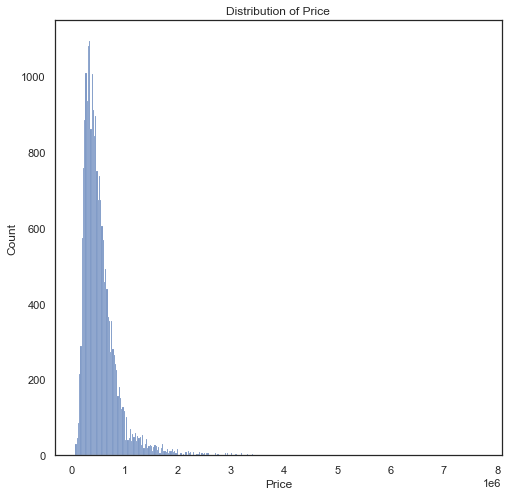

In [18]:
#Since price is our target, we will explore first
#view distribution of price using histogram
sns.set(style = 'white')
fig, ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df, x = 'price', palette = 'Dark', )
ax.set_xlabel('Price')
ax.set_ylabel('Count')
ax.set_title('Distribution of Price')
plt.show()

We notice from the histogram that the price data is skewed to the right, indicating a non-normal distribution. This is further validated by the box-plot below

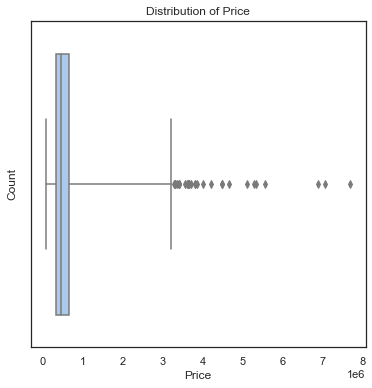

In [19]:
#plot a boxplot for price
sns.set(style = 'white')
fig, ax = plt.subplots(figsize = (6,6))
sns.boxplot(data = df, x = 'price', palette = 'pastel', fliersize = 5, whis = 8)
ax.set_xlabel('Price')
ax.set_ylabel('Count')
ax.set_title('Distribution of Price')
plt.show()

To normalize the price data, we log-transformed (base of e) the data. We can see in the histogram below, the log-transformed data looks more similar to a normal distribution than untransformed price data. 

In [20]:
#Because the data is skewed to the right, transform the price data using log
df['ln_price'] = np.log(df['price'])

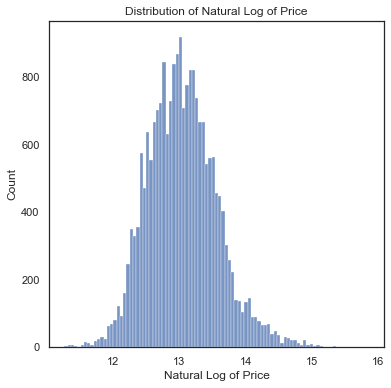

In [21]:
#view distribution of log base e for price using histogram
sns.set(style = 'white')
fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(data = df, x = 'ln_price', palette = 'Dark')
ax.set_xlabel('Natural Log of Price')
ax.set_ylabel('Count')
ax.set_title('Distribution of Natural Log of Price')
plt.show()

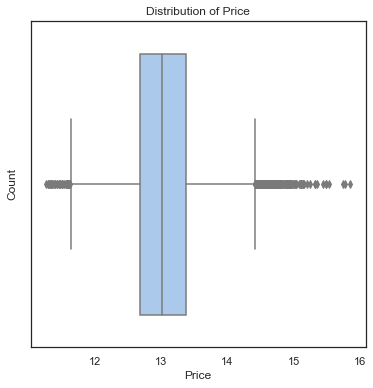

In [22]:
sns.set(style = 'white')
fig, ax = plt.subplots(figsize = (6,6))
sns.boxplot(data = df, x = 'ln_price', palette = "pastel")
ax.set_xlabel("Price")
ax.set_ylabel("Count")
ax.set_title("Distribution of Price")
plt.show()

### Features: Everything Else

To review the features of the data, we first analyze a pair plot of the data to first identify the numeric and categorical features. We can also see linearity between the target and each feature from the plot. 

In [23]:
#plot the pairplot of the dataframe
#note that both price and ln(price) are included
#sns.pairplot(df)

In [24]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'if_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_of_date', 'age_of_house',
       'ln_price'],
      dtype='object')

In [25]:
#based on the pairplot, we can see which data are categorical and which are numeric
numeric = ['bedrooms', 
           'bathrooms', 
           'sqft_living', 
           'sqft_lot', 
           'sqft_above', 
           'sqft_basement',
           'lat', 
           'long',
           'sqft_living15', 
           'sqft_lot15']

categorical = ['floors',
               'waterfront', 
               'view', 
               'condition', 
               'grade',
               'if_renovated',
               'zipcode',
               'month_of_date']

It's important to validate that all observations are properly input or they could throw off the modeling process. Some erroneous observations may have values that dont make sense in a realworld context making them easy to identify and remove. 

In [26]:
#visually inspecting value counts to look for weird values
for column in df.columns:
    if not column == 'price':
        display(df[column].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

0    21451
1      146
Name: waterfront, dtype: int64

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

0    20853
1      744
Name: if_renovated, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month_of_date, dtype: int64

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: age_of_house, Length: 117, dtype: int64

13.017003    172
12.765688    172
13.217674    159
13.122363    152
12.959844    150
            ... 
12.939128      1
12.857382      1
12.341041      1
13.109278      1
12.457609      1
Name: ln_price, Length: 3622, dtype: int64

In [27]:
#found 1 obs that should be removed
df[df['bedrooms'] >= 20]
df.drop(15856, inplace=True)

In [28]:
#these look fine
df[df['bathrooms']>6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,if_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,age_of_house,ln_price
4020,800000.0,7,6.75,7480,41664,2.0,0,2,3,11,...,2400,0,98166,47.4643,-122.368,2810,33190,10,61,13.592367
7245,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,...,3480,1,98102,47.6298,-122.323,3940,8800,10,104,15.856731
8085,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,...,4820,1,98040,47.5570,-122.210,3270,10454,6,31,15.356670
8537,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,...,0,0,98144,47.5923,-122.301,1448,3866,8,18,13.017003
9245,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,1030,0,98039,47.6305,-122.240,4540,42730,9,13,15.745582
12764,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,...,4130,0,98053,47.6675,-121.986,4850,217800,5,15,14.639686
14542,2890000.0,5,6.25,8670,64033,2.0,0,4,3,13,...,2550,0,98177,47.7295,-122.372,4140,81021,6,49,14.876767
18288,3300000.0,5,6.25,8020,21738,2.0,0,0,3,11,...,0,0,98006,47.5675,-122.189,4160,18969,7,13,15.009433
20562,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,...,1420,0,98075,47.5947,-122.039,2710,12550,3,8,13.981025
21490,2240000.0,5,6.50,7270,130017,2.0,0,0,3,12,...,850,0,98027,47.5371,-121.982,1800,44890,5,4,14.621986


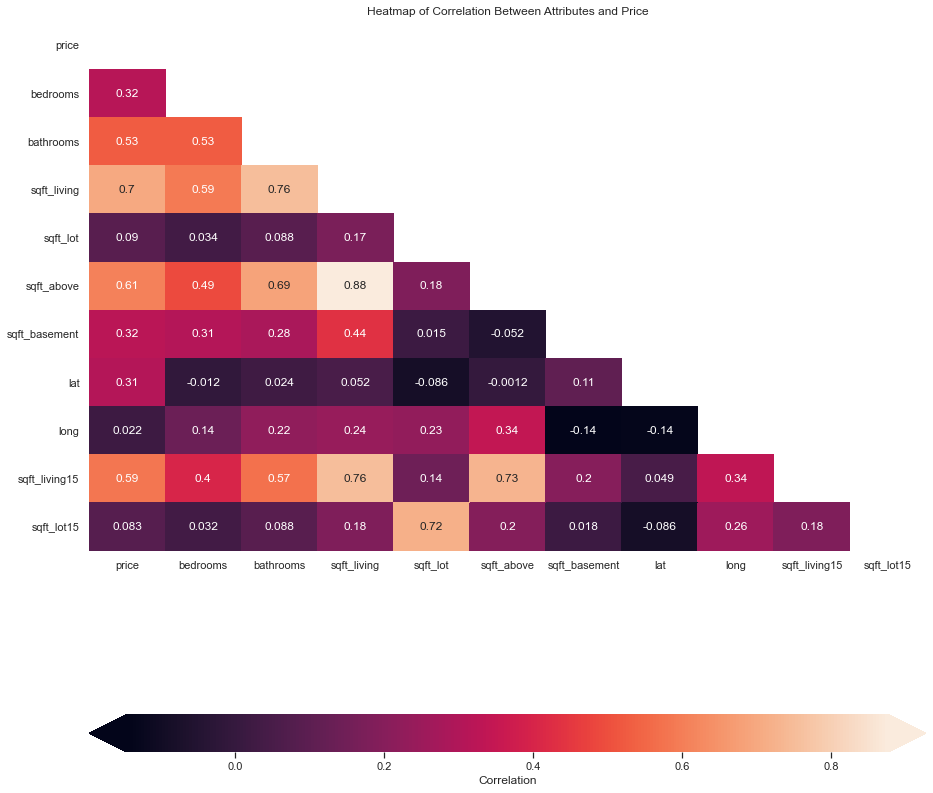

In [29]:
# Create a df with the target as the first column,
# then compute the correlation matrix
X = df[numeric]
y = df['price']
heatmap_data = pd.concat([y, X], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes and Price");

In [30]:
#reporting the correlation between price (target) and predictors
df.corr()['price'].drop(['ln_price']).map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.393502
sqft_basement    0.323794
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
if_renovated     0.117546
sqft_lot         0.089879
sqft_lot15       0.082849
age_of_house     0.053901
zipcode          0.053409
condition        0.036031
long             0.022047
month_of_date    0.009926
Name: price, dtype: float64

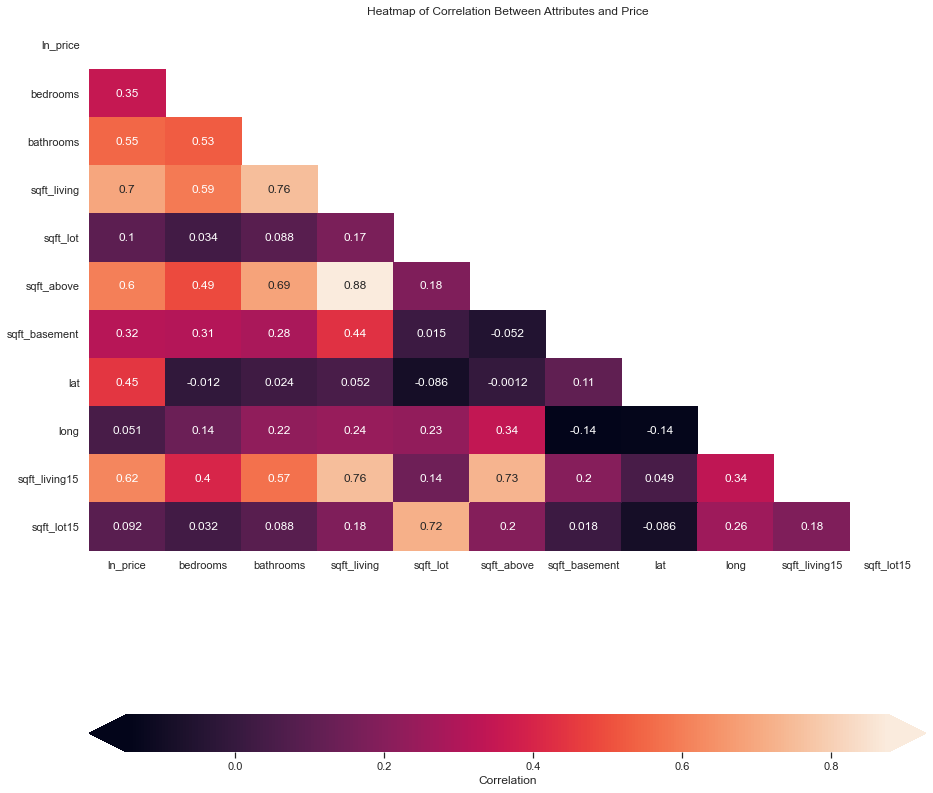

In [31]:
# Create a df with the target as the first column,
# then compute the correlation matrix
X = df[numeric]
ln_y = df['ln_price']
heatmap_data = pd.concat([ln_y, X], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes and Price");

In [32]:
drop_columns = ['long','sqft_lot15', 'sqft_lot', 'sqft_living', 'sqft_living15', 'bathrooms']

In [33]:
#reporting the correlation between ln price (target) and predictors
df.corr()['ln_price'].drop(['price']).map(abs).sort_values(ascending=False)

ln_price         1.000000
grade            0.703747
sqft_living      0.695209
sqft_living15    0.619371
sqft_above       0.601621
bathrooms        0.551270
lat              0.448824
bedrooms         0.350871
view             0.344665
sqft_basement    0.316908
floors           0.310665
waterfront       0.170724
if_renovated     0.106534
sqft_lot         0.100032
sqft_lot15       0.092290
age_of_house     0.080523
long             0.050887
condition        0.038855
zipcode          0.038801
month_of_date    0.013058
Name: ln_price, dtype: float64

We reviewed the distribution of features and see if we need to log-transform the features.

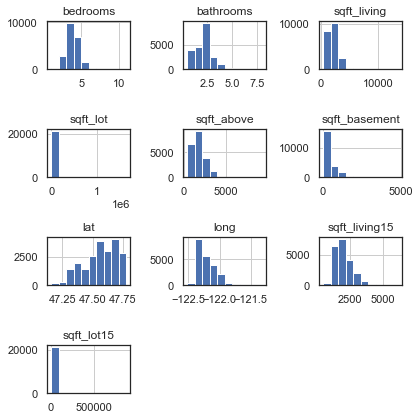

In [34]:
#plot the numeric features to see distribution and see if they need to be log-transformed
df[numeric].hist(figsize=[6,6]);
plt.tight_layout()
plt.show()

In [35]:
#log transform all numeric feature except:
#sqft basement - has values of 0
#long - has negative values
to_ln = ['bedrooms',
         'bathrooms',
         'sqft_living',
         'sqft_lot', 
         'sqft_above',
         'lat',
         'sqft_living15', 
         'sqft_lot15']

for column in to_ln:
    df[column] = np.log(df[column])

## Data Mainipulation

For this section, we focused on create an efficient way to take our cleaned dataframe and create train and test splits for each of our model.

In [36]:
#create two dataframes, one without ln_price, and without price
output = df.drop(['ln_price'], axis=1) 
output_ln = df.drop(['price'], axis=1)

In [37]:
output_ln = output_ln.drop(drop_columns, axis=1)

In [38]:
def train_test(df, target, test_size=0.20, random_state=42):
    '''
    This function takes in a dataframe df and target column and returns the train and test split
    Default test size is 20, default random state is 42
    '''
    
    df = pd.get_dummies(df, prefix=categorical, prefix_sep='_', columns=categorical, drop_first=True)
    
    #replace '.' with '_' in column names since sklearn LR has issues with '.'
    df.columns = [x.replace(".","_") for x in df.columns]

    #dropping targets out of predictors
    X = df.drop(target, axis=1)

    #set target with y
    y = df[target]
    
    #creating  train test split for model comparison
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_list = [X_train, X_test]
    
    #scaling X values into z-scores
    ss = StandardScaler()
    for i in X_list:
        ss.fit(i)
        i = pd.DataFrame(ss.transform(i))
        i.columns = X.columns
    
    return X_train, X_test, y_train, y_test

## Other Formulas and Useful Objects

We created several formulas to efficiently run repetitive processes, including running cross validation, checking for R-squared and RMSE, and plotting different linear regression assumption tests.

In [39]:
def cross_val(estimator,X,y,n_splits=10,test_size=0.25, random_state=None):
    """
    This formula performs cross validation using shuffled splits. Output is a tuple,
    The 0th element is the median R2 score for the train sets, the 1st element
    is the median R2 score for the test sets.
    
    """
    splitter = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)

    output = cross_validate(estimator, X=X, y=y, cv=splitter, return_train_score=True)
    return np.median(output['train_score']), np.median(output['test_score'])

In [40]:
#returns a summary of the median train R-squared, median test R-squared, and differential score based
#on the cross validation
def cval_summary(train,test,diff):
    return f"The median R-squared values for the train sets were {round(train,3)}, the median R-squared values for the test sets were {round(test,3)}. These values resulted in a differential of {round(diff,5)}"

In [41]:
def score_model(model, Xtrain, Xtest, ytrain, ytest, log=False):
    '''
    This function takes in a model and the train and test samples and returns
    the train R-squared, test R-squared, and the RMSE
    '''
    if log == False:
        rmse = mean_squared_error(ytest, model.predict(Xtest), squared=False)
    else:
        rmse = mean_squared_error(np.exp(ytest), np.exp(model.predict(Xtest)), squared=False)
    return model.score(Xtrain, ytrain),  model.score(Xtest, ytest), rmse

In [42]:
#returns a summary of the train R-squared, test R-squared, differential between R-squared, and RMSE
def model_summary(train,test,diff,rmse):
    return f"The R-squared value for the train set was {round(train,3)}, and the R-squared value for the test set was {round(test,3)}. These values resulted in a differential of {round(diff,5)}. The RMSE of our model predicitons was {round(rmse,2)}"

In [43]:
def normality_test(ols_model):
    """
    tests for normality by taking in an OLS model, and reporting out different test features
    and plots the Q-Q plot
    """
    residuals = ols_model.resid
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(residuals)
    for name, test in zip(name, test):
        print('\n',name, '----')
        print(test)
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
    fig.show();

In [44]:
def homoscedasticity_test(ols_model):
    """
    tests for homoscedasticity by taking in an OLS model, and reporting out different test features
    and plots residual vs fitted plot
    """
    predicted_y = ols_model.predict()
    resids = ols_model.resid

    fig, ax = plt.subplots()

    sns.regplot(x=predicted_y, y=resids, lowess=True, ax=ax, line_kws={'color': 'red'})
    ax.set_title('Residuals vs Fitted', fontsize=16)
    ax.set(xlabel='Fitted Values', ylabel='Residuals')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, ols_model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, ols_model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plot ----')

In [45]:
def actual_vs_predicted(model,X_test,y_test):
    """
    Plots the actual y vs the predicted y
    """
    y_predicted = model.predict(X_test)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(x=y_test, y=y_predicted)
    ax.set_xlabel("Actual Price Values")
    ax.set_ylabel("Predicted Price Values")
    ax.set_title("Actual vs Predicted")
    
    p1 = max(max(y_test), max(y_predicted))
    p2 = min(min(y_test), min(y_predicted))
    plt.plot([p1, p2], [p1, p2], 'b-')

In [46]:
def plot_cooks_distance(c):
    """
    takes in cook's distance data and plots the cook's distance
    """
    _, ax = plt.subplots(figsize=(6,6))
    ax.stem(c, markerfmt=",")
    ax.set_xlabel("instance")
    ax.set_ylabel("distance")
    ax.set_title("Cook's Distance")
    return ax

## Baseline Model

For the baseline model, we used a Dummy Regressor model which takes the mean of the price as the y-predicted value

### Baseline: Target Price

In [47]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test(output, 'price')

#create a dummy regressor model based on the target as price
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train,y_train);

In [48]:
#setting up cross validation for price in a different way (x3)
bmodel_cval = cross_val(baseline_model,
                        X=X_train,
                        y=y_train,
                        random_state=0)

bmodel_cval_summary = cval_summary(bmodel_cval[0],
                                   bmodel_cval[1],
                                   abs(bmodel_cval[0]-bmodel_cval[1]))
bmodel_cval_summary

'The median R-squared values for the train sets were 0.0, the median R-squared values for the test sets were -0.0. These values resulted in a differential of 0.00014'

In [49]:
baseline_scores = score_model(baseline_model,
                              X_train,
                              X_test,
                              y_train,
                              y_test)

In [50]:
baseline_summary = model_summary(baseline_scores[0],
                                 baseline_scores[1],
                                 abs(baseline_scores[0]-baseline_scores[1]),
                                 baseline_scores[2])
baseline_summary

'The R-squared value for the train set was 0.0, and the R-squared value for the test set was -0.0. These values resulted in a differential of 0.00016. The RMSE of our model predicitons was 361985.86'

### Baseline: Target Log-transformed Price

In [51]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test(output_ln, 'ln_price')

#create `a dummy regressor model based on the target as price
baseline_ln_model = DummyRegressor(strategy='mean')
baseline_ln_model.fit(X_train,y_train);

In [52]:
bmodel_ln_cval = cross_val(baseline_ln_model,
                           X=X_train,
                           y=y_train,
                           random_state=0)

bmodel_ln_cval_summary = cval_summary(bmodel_ln_cval[0],
                                      bmodel_ln_cval[1], 
                                      abs(bmodel_ln_cval[0]-bmodel_ln_cval[1]))
bmodel_ln_cval_summary

'The median R-squared values for the train sets were 0.0, the median R-squared values for the test sets were -0.0. These values resulted in a differential of 0.00015'

In [53]:
baseline_ln_scores = score_model(baseline_ln_model,
                                 X_train,
                                 X_test,
                                 y_train,
                                 y_test,
                                 log=True)

baseline_ln_scores

(0.0, -0.00010221773342600216, 369029.04857828317)

In [54]:
baseline_ln_summary = model_summary(baseline_ln_scores[0],
                                    baseline_ln_scores[1],
                                    abs(baseline_ln_scores[0]-baseline_ln_scores[1]),
                                    baseline_ln_scores[2])
baseline_ln_summary

'The R-squared value for the train set was 0.0, and the R-squared value for the test set was -0.0. These values resulted in a differential of 0.0001. The RMSE of our model predicitons was 369029.05'

### Summary

After running cross validation with both of our baseline models to ensure data integrity, we found from the results of our regression R-squared scores that the fit of the data we found that the cross-validation, train and test scores were all near 0. This is to be expected of the baseline model due to it's horizontal nature. Exactly 0% of the variation in y train is predicted by a horizontal line through the mean and 100% of it is due to variance.

>The miniscule inscrease in R-squared for the test set is due to the slight change in mean from the train to test sets.

The RMSE for the baseline model was approximately 360-370K.

## Model 1

Model 1 uses a multiple linear regression model of the data using all features, including the dummied out categorical features.

### Model 1: Target Price

We analyzed the untransformed price data set.

In [55]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test(output, 'price')

#create linear regression model for price and setting up cross validation 
model1 = LinearRegression()
model1.fit(X_train, y_train);

In [56]:
#setting up cross validation for price in a different way 
model1_cval = cross_val(model1,
                        X= X_train,
                        y=y_train,
                        random_state=0)

model1_cval_summary = cval_summary(model1_cval[0],
                                   model1_cval[1],
                                   abs(model1_cval[0]-model1_cval[1]))
model1_cval_summary

'The median R-squared values for the train sets were 0.837, the median R-squared values for the test sets were 0.83. These values resulted in a differential of 0.007'

In [57]:
model1_scores = score_model(model1,
                            X_train,
                            X_test,
                            y_train,
                            y_test)

model1_summary = model_summary(model1_scores[0],
                               model1_scores[1],
                               abs(model1_scores[0]-model1_scores[1]),
                               model1_scores[2])
model1_summary

'The R-squared value for the train set was 0.836, and the R-squared value for the test set was 0.806. These values resulted in a differential of 0.0307. The RMSE of our model predicitons was 159586.6'

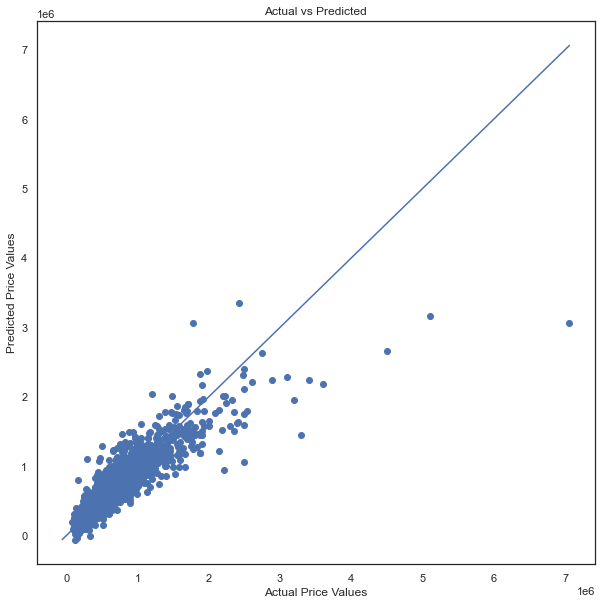

In [58]:
actual_vs_predicted(model1, X_test, y_test)

We see from the Actual vs Predicted plot that though most of the data points seems to be clustered around the benchmark, there are noticeable outliers.

### Model 1: Target Price - OLS and Assumption Tests

We find the OLS of the model to review the p values across all features and use the OLS model to run assumption tests

In [59]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model1_ols = sm.OLS(y_train, X_train).fit()

In [60]:
model1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     755.7
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:18:11   Log-Likelihood:            -2.3032e+05
No. Observations:               17276   AIC:                         4.609e+05
Df Residuals:                   17159   BIC:                         4.618e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.328e+07   1.31e+07     -5.597      0.000   -9.89e+07   -4.76e+07
bedrooms         -1.966e+04   5674.515     -3.465      0.001   -3.08e+04   -8539.234
bathrooms         3.327e+04   5472.637      6.080      0.000    2.25e+04     4.4e+04
sqft_living      -2.338e+05   1.64e+04    -14.266      0.000   -2.66e+05   -2.02e+05
sqft_lot          3.668e+04   3374.128     10.871      0.000    3.01e+04    4.33e+04
sqft_above        4.506e+05   1.46e+04     30.763      0.000    4.22e+05    4.79e+05
sqft_basement      205.1065      7.665     26.758      0.000     190.082     220.131
lat                 1.2e+07   3.14e+06      3.823      0.000    5.85e+06    1.81e+07
long             -2.059e+05   4.71e+04     -4.370      0.000   -2.98e+05   -1.14e+05
sqft_living15      5.45e+04   6290.855      8.663      0.000    4.22e+04    6.68e+04
sqft_lot15       -1.652e+04   3713.646     -4.450      0.000   -2.38e+04   -9245.181
age_of_house       -73.3669     74.724     -0.982      0.326    -219.834      73.101
floors_1_5       -1.496e+04   4728.987     -3.163      0.002   -2.42e+04   -5687.674
floors_2_0       -1.326e+04   4070.411     -3.257      0.001   -2.12e+04   -5280.578
floors_2_5        7.871e+04   1.41e+04      5.574      0.000     5.1e+04    1.06e+05
floors_3_0       -6.858e+04   8905.293     -7.701      0.000    -8.6e+04   -5.11e+04
floors_3_5         1.81e+04   5.71e+04      0.317      0.751   -9.38e+04     1.3e+05
waterfront_1      5.844e+05   1.71e+04     34.150      0.000    5.51e+05    6.18e+05
view_1            9.487e+04   9684.444      9.796      0.000    7.59e+04    1.14e+05
view_2            6.066e+04   5898.433     10.284      0.000    4.91e+04    7.22e+04
view_3            1.438e+05   8054.789     17.855      0.000    1.28e+05     1.6e+05
view_4            2.814e+05   1.18e+04     23.778      0.000    2.58e+05    3.05e+05
condition_2       8.726e+04    3.6e+04      2.424      0.015    1.67e+04    1.58e+05
condition_3       1.006e+05   3.39e+04      2.965      0.003    3.41e+04    1.67e+05
condition_4       1.261e+05    3.4e+04      3.714      0.000    5.96e+04    1.93e+05
condition_5        1.81e+05   3.41e+04      5.303      0.000    1.14e+05    2.48e+05
grade_4           -1.58e+05   1.54e+05     -1.025      0.305    -4.6e+05    1.44e+05
grade_5          -1.902e+05   1.51e+05     -1.262      0.207   -4.85e+05    1.05e+05
grade_6          -2.123e+05    1.5e+05     -1.412      0.158   -5.07e+05    8.24e+04
grade_7            -2.2e+05    1.5e+05     -1.463      0.144   -5.15e+05    7.48e+04
grade_8          -2.004e+05    1.5e+05     -1.332      0.183   -4.95e+05    9.45e+04
grade_9          -1.037e+05   1.51e+05     -0.689      0.491   -3.99e+05    1.91e+05
grade_10          4.986e+04   1.51e+05      0.331      0.741   -2.45e+05    3.45e+05
grade_11           3.06


 Jarque-Bera ----
1142842.4719306459

 Prob ----
0.0

 Skew ----
2.7188772758070834

 Kurtosis ----
42.47251635922764


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


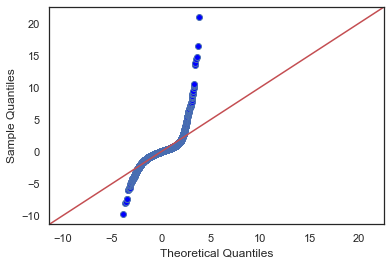

In [61]:
#test for normality
normality_test(model1_ols);

We can clearly see from the Q-Q plot that this model is not normal, and that is further validated by the high Jarque-Bera score.


 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  4563.790739
p-value                           0.000000
f-value                          53.105399
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  0.910440
p-value      0.999993

 Residuals plot ----


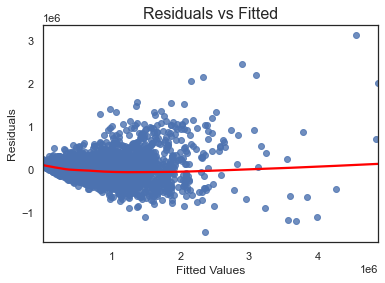

In [62]:
#test for homoscedasticity
homoscedasticity_test(model1_ols)

The Residual vs Fitted plot also shows that the data is heteroscedastic.

### Model 1: Target Price - Influence and Outliers

In order to reduce the RMSE, we tried to find any outliers within the dataset using Cook's Distance, which identifies any influential outliers, and removed them. We apply the same methodology to the test sample as we did to the train as well.

In [63]:
#find the cooks distance
inf = influence(model1_ols)
C, P = inf.cooks_distance

<AxesSubplot:title={'center':"Cook's Distance"}, xlabel='instance', ylabel='distance'>

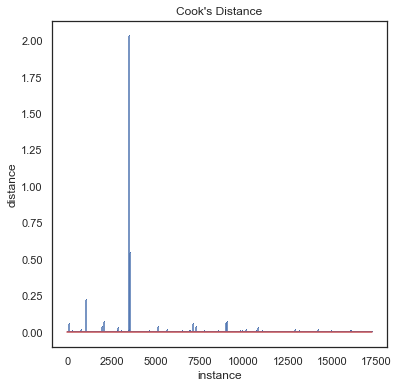

In [64]:
#plot cooks distance
plot_cooks_distance(C)

In [65]:
#create a new dataframe from main dataframe
train_df = pd.concat([y_train, X_train], axis=1)

#add new column for cooks distance
train_df['influence'] = C

In [66]:
#using the IQR rule, check what proportion of influence are outliers
quantile_75 = train_df['influence'].quantile(0.75)
quantile_25 = train_df['influence'].quantile(0.25)
iqr = quantile_75-quantile_25

elim_train_df = train_df[(train_df['influence'] > quantile_75 + 3*iqr) | 
                         (train_df['influence'] < quantile_25 - 3*iqr)]

In [67]:
#find the indexes related to the top x rows by cooks distance
list_index = list(elim_train_df.index)

#what proportion of df are we removing
print(round(len(elim_train_df)/len(train_df),2))

0.1


In [68]:
#drop any rows with the index of top x rows by cooks distance
#removes the influence and const columns for proper retesting in the next section
train_df.drop(index=list_index, inplace=True)
train_df.drop(columns=['influence','const'], inplace=True)

We apply what we did to the train sample to the test sample below:

### Model 1: Target Price - Retesting Based on Removed Outliers

Here, we are refiting the training sample after dropping the outliers and rerunning the linear regression

In [69]:
#split data into train and test
X_train = train_df.drop(['price'], axis = 1)
y_train = train_df['price']

In [70]:
#create linear regression model for price and setting up cross validation 
model1_adj = LinearRegression()
model1_adj.fit(X_train, y_train);

In [71]:
#setting up cross validation for price in a different way 
model1_adj_cval = cross_val(model1_adj,
                        X=X_train,
                        y=y_train,
                        random_state=0)

model1_adj_cval_summary = cval_summary(model1_adj_cval[0],
                                   model1_adj_cval[1],
                                   abs(model1_adj_cval[0]-model1_adj_cval[1]))
model1_adj_cval_summary

'The median R-squared values for the train sets were 0.908, the median R-squared values for the test sets were 0.906. These values resulted in a differential of 0.00243'

In [72]:
model1_adj_scores = score_model(model1_adj,
                            X_train,
                            X_test,
                            y_train,
                            y_test)

model1_adj_summary = model_summary(model1_adj_scores[0],
                               model1_adj_scores[1],
                               abs(model1_adj_scores[0]-model1_adj_scores[1]),
                               model1_adj_scores[2])
model1_adj_summary

'The R-squared value for the train set was 0.908, and the R-squared value for the test set was 0.799. These values resulted in a differential of 0.10882. The RMSE of our model predicitons was 162325.76'

We see that though the R-squared train set is higher than that of the previous analysis with the outliers, the test R-squared is lower. The RMSE is also lower. 

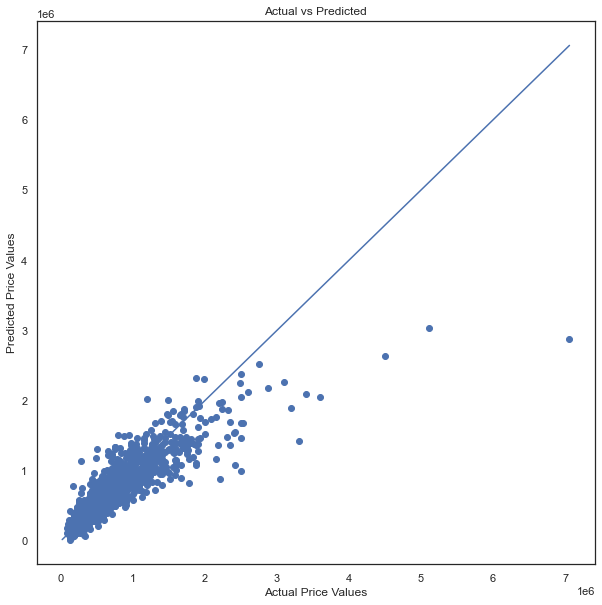

In [73]:
actual_vs_predicted(model1_adj, X_test, y_test)

In [74]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model1_adj_ols = sm.OLS(y_train, X_train).fit()

In [75]:
model1_adj_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1338.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:18:32   Log-Likelihood:            -1.9718e+05
No. Observations:               15627   AIC:                         3.946e+05
Df Residuals:                   15512   BIC:                         3.955e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.639e+07   6.15e+06     -5.918      0.000   -4.84e+07   -2.43e+07
bedrooms         -1.051e+04   2979.279     -3.527      0.000   -1.63e+04   -4667.983
bathrooms         1.901e+04   2836.872      6.700      0.000    1.34e+04    2.46e+04
sqft_living      -1.076e+05   9705.077    -11.091      0.000   -1.27e+05   -8.86e+04
sqft_lot          3.099e+04   1847.201     16.777      0.000    2.74e+04    3.46e+04
sqft_above        2.874e+05   8752.692     32.835      0.000     2.7e+05    3.05e+05
sqft_basement      138.6568      4.947     28.026      0.000     128.959     148.354
lat               6.022e+06   1.63e+06      3.699      0.000    2.83e+06    9.21e+06
long             -1.283e+05   2.54e+04     -5.061      0.000   -1.78e+05   -7.86e+04
sqft_living15     4.968e+04   3325.783     14.937      0.000    4.32e+04    5.62e+04
sqft_lot15       -1.119e+04   2003.295     -5.584      0.000   -1.51e+04   -7259.160
age_of_house       -53.3411     40.206     -1.327      0.185    -132.149      25.467
floors_1_5       -2108.5305   2477.252     -0.851      0.395   -6964.234    2747.173
floors_2_0       -2079.8666   2136.296     -0.974      0.330   -6267.257    2107.524
floors_2_5        6.715e+04   1.05e+04      6.419      0.000    4.66e+04    8.77e+04
floors_3_0       -5.431e+04   4698.851    -11.558      0.000   -6.35e+04   -4.51e+04
floors_3_5        2.482e+04    5.2e+04      0.477      0.633   -7.72e+04    1.27e+05
waterfront_1      5.994e+05      2e+04     29.979      0.000     5.6e+05    6.39e+05
view_1            7.837e+04   5782.097     13.554      0.000     6.7e+04    8.97e+04
view_2            5.924e+04   3251.202     18.219      0.000    5.29e+04    6.56e+04
view_3            1.321e+05   5045.230     26.186      0.000    1.22e+05    1.42e+05
view_4            2.741e+05   9440.576     29.039      0.000    2.56e+05    2.93e+05
condition_2       6.858e+04   3.38e+04      2.027      0.043    2261.233    1.35e+05
condition_3       9.287e+04   3.32e+04      2.801      0.005    2.79e+04    1.58e+05
condition_4       1.123e+05   3.32e+04      3.384      0.001    4.72e+04    1.77e+05
condition_5       1.555e+05   3.32e+04      4.682      0.000    9.04e+04    2.21e+05
grade_4          -4.231e+06   6.83e+05     -6.193      0.000   -5.57e+06   -2.89e+06
grade_5          -4.264e+06   6.83e+05     -6.242      0.000    -5.6e+06   -2.93e+06
grade_6          -4.273e+06   6.83e+05     -6.254      0.000   -5.61e+06   -2.93e+06
grade_7          -4.268e+06   6.83e+05     -6.247      0.000   -5.61e+06   -2.93e+06
grade_8          -4.238e+06   6.83e+05     -6.203      0.000   -5.58e+06    -2.9e+06
grade_9          -4.143e+06   6.83e+05     -6.064      0.000   -5.48e+06    -2.8e+06
grade_10         -4.018e+06   6.83e+05     -5.881      0.000   -5.36e+06   -2.68e+06
grade_11         -3.717


 Jarque-Bera ----
391.6698086225466

 Prob ----
8.912133708003742e-86

 Skew ----
0.2495050696380397

 Kurtosis ----
3.593731177707216


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


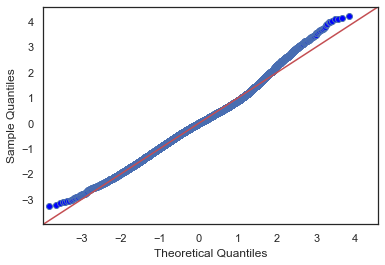

In [76]:
#test for normality
normality_test(model1_adj_ols);


 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  2570.226521
p-value                           0.000000
f-value                          26.785421
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  1.000478
p-value      0.491630

 Residuals plot ----


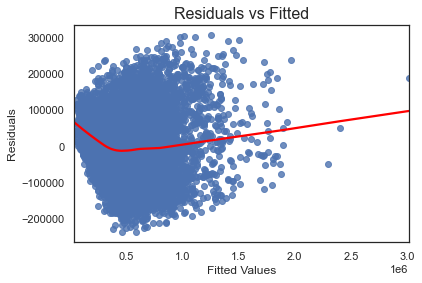

In [77]:
#test for homoscedasticity
homoscedasticity_test(model1_adj_ols)

### Model 1: Target Log-transformed Price

We repeat Model 1 for the log-transformed price data.

In [78]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test(output_ln, 'ln_price')

#create linear regression model for ln price
model1_ln= LinearRegression()
model1_ln.fit(X_train, y_train);

In [79]:
#setting up cross validation
model1_ln_cval = cross_val(model1_ln,
                           X=X_train,
                           y=y_train,
                           random_state=0)

model1_ln_cval_summary = cval_summary(model1_ln_cval[0],
                                      model1_ln_cval[1],
                                      abs(model1_ln_cval[0]-model1_ln_cval[1]))
model1_ln_cval_summary

'The median R-squared values for the train sets were 0.877, the median R-squared values for the test sets were 0.877. These values resulted in a differential of 0.0009'

In [80]:
#find the test score using the linear model
model1_ln_scores = score_model(model1_ln,
                             X_train,
                             X_test,
                             y_train,
                             y_test,
                             log=True)

model1_ln_summary = model_summary(model1_ln_scores[0],
                                  model1_ln_scores[1],
                                  abs(model1_ln_scores[0]-model1_ln_scores[1]),
                                  model1_ln_scores[2])
model1_ln_summary

'The R-squared value for the train set was 0.878, and the R-squared value for the test set was 0.872. These values resulted in a differential of 0.00535. The RMSE of our model predicitons was 125650.69'

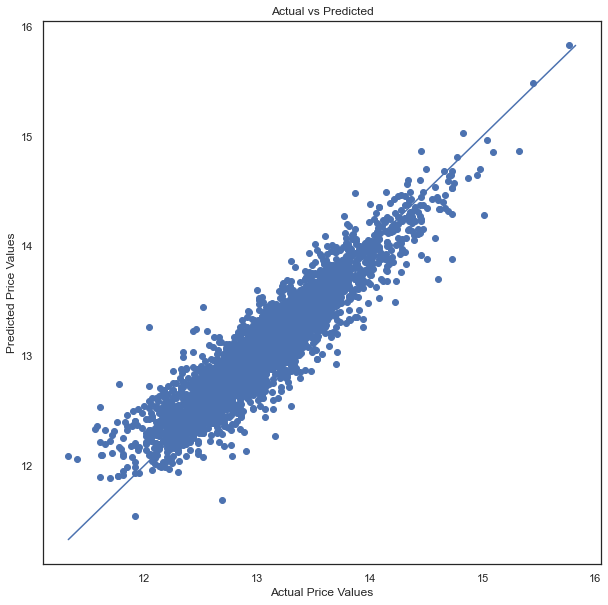

In [81]:
actual_vs_predicted(model1_ln, X_test, y_test)

### Model 1: Log-transformed Price - OLS and Assumption Tests

In [82]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model1_ln_ols = sm.OLS(y_train, X_train).fit()

In [83]:
model1_ln_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:18:53   Log-Likelihood:                 4673.9
No. Observations:               17276   AIC:                            -9126.
Df Residuals:                   17165   BIC:                            -8265.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -95.4158     14.938     -6.387      0.000    -124.696     -66.136
bedrooms            -0.0264      0.007     -3.870      0.000      -0.040      -0.013
sqft_above           0.5109      0.007     72.261      0.000       0.497       0.525
sqft_basement        0.0002   4.08e-06     42.428      0.000       0.000       0.000
lat                 27.0210      3.873      6.977      0.000      19.429      34.612
age_of_house         0.0004   8.62e-05      4.238      0.000       0.000       0.001
floors_1_5          -0.0220      0.006     -3.792      0.000      -0.033      -0.011
floors_2_0          -0.0342      0.005     -7.167      0.000      -0.044      -0.025
floors_2_5          -0.0549      0.017     -3.172      0.002      -0.089      -0.021
floors_3_0          -0.1575      0.011    -14.753      0.000      -0.178      -0.137
floors_3_5          -0.1507      0.071     -2.137      0.033      -0.289      -0.012
waterfront_1         0.4545      0.021     21.475      0.000       0.413       0.496
view_1               0.1443      0.012     12.085      0.000       0.121       0.168
view_2               0.1206      0.007     16.640      0.000       0.106       0.135
view_3               0.1958      0.010     19.816      0.000       0.176       0.215
view_4               0.2964      0.015     20.354      0.000       0.268       0.325
condition_2          0.1574      0.045      3.535      0.000       0.070       0.245
condition_3          0.2603      0.042      6.203      0.000       0.178       0.342
condition_4          0.3029      0.042      7.217      0.000       0.221       0.385
condition_5          0.3722      0.042      8.826      0.000       0.290       0.455
grade_4             -0.6385      0.191     -3.347      0.001      -1.012      -0.265
grade_5             -0.5521      0.186     -2.962      0.003      -0.917      -0.187
grade_6             -0.4953      0.186     -2.662      0.008      -0.860      -0.131
grade_7             -0.3982      0.186     -2.140      0.032      -0.763      -0.033
grade_8             -0.2974      0.186     -1.597      0.110      -0.662       0.068
grade_9             -0.1591      0.186     -0.854      0.393      -0.524       0.206
grade_10            -0.0555      0.186     -0.297      0.766      -0.421       0.310
grade_11             0.0693      0.187      0.371      0.711      -0.297       0.435
grade_12             0.1891      0.188      1.007      0.314      -0.179       0.557
grade_13             0.3644      0.195      1.867      0.062      -0.018       0.747
if_renovated_1       0.0646      0.008      7.816      0.000       0.048       0.081
zipcode_98002       -0.0446      0.019     -2.370      0.018      -0.082      -0.008
zipcode_98003        0.0116      0.017      0.695      0.487      -0.021       0.044
zipcode_98004        0.


 Jarque-Bera ----
5372.534503957657

 Prob ----
0.0

 Skew ----
-0.13630161253628775

 Kurtosis ----
5.718320922963795


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


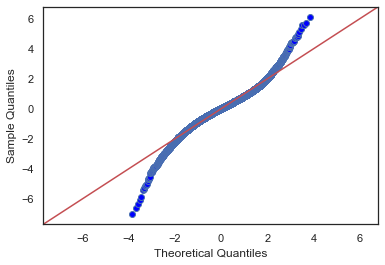

In [84]:
#test for normality
normality_test(model1_ln_ols);


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.501054e+03
p-value                        9.753542e-243
f-value                         1.484839e+01
f p-value                      1.156442e-255

 Goldfeld-Quandt test ----
                value
F statistic  0.957364
p-value      0.977872

 Residuals plot ----


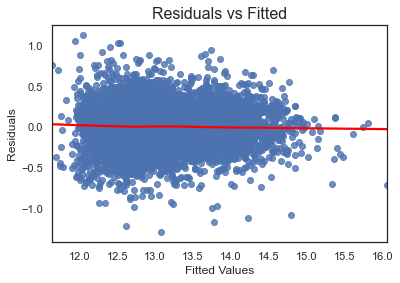

In [85]:
#test for homoscedasticity
homoscedasticity_test(model1_ln_ols)

### Model 1: Log-transformed Price  - Influence and Outliers

In [86]:
#find the cooks distance
inf = influence(model1_ln_ols)
C, P = inf.cooks_distance

/Users/arthur/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/Users/arthur/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<AxesSubplot:title={'center':"Cook's Distance"}, xlabel='instance', ylabel='distance'>

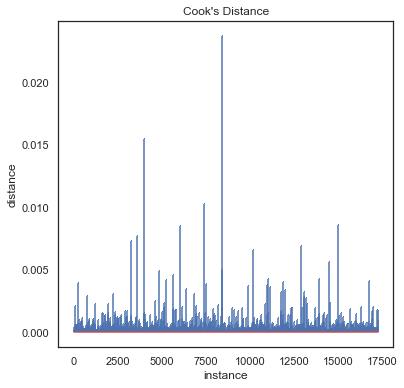

In [87]:
#plot cooks distance
plot_cooks_distance(C)

In [88]:
#create a new dataframe from main dataframe
train_df = pd.concat([y_train, X_train], axis=1)

#add new column for cooks distance
train_df['influence'] = C

In [89]:
#using the IQR rule, check what proportion of influence are outliers
quantile_75 = train_df['influence'].quantile(0.75)
quantile_25 = train_df['influence'].quantile(0.25)
iqr = quantile_75-quantile_25

elim_train_df = train_df[(train_df['influence'] > quantile_75 + 3*iqr) | 
                       (train_df['influence'] < quantile_25 - 3*iqr)]


In [90]:
#find the indexes related to the top x rows by cooks distance
list_index = list(elim_train_df.index)

#what proportion of df are we removing
print(round(len(elim_train_df)/len(train_df),2))

0.07


In [91]:
#drop any rows with the index of top x rows by cooks distance and any nulls
train_df.drop(index=list_index, inplace=True)
train_df.drop(columns=['influence','const'], inplace=True)

### Model 1: Log-transformed Price  - Retesting Based on Removed Outliers

In [92]:
#split data into train and test
X_train = train_df.drop(['ln_price'], axis = 1)
y_train = train_df['ln_price']

#create linear regression model for ln price
model1_ln_adj= LinearRegression()
model1_ln_adj.fit(X_train, y_train);

In [93]:
#setting up cross validation
model1_ln_adj_cval = cross_val(model1_ln_adj,
                           X=X_train,
                           y=y_train,
                           random_state=0)

model1_ln_adj_cval_summary = cval_summary(model1_ln_adj_cval[0],
                                      model1_ln_adj_cval[1],
                                      abs(model1_ln_adj_cval[0]-model1_ln_adj_cval[1]))
model1_ln_adj_cval_summary

'The median R-squared values for the train sets were 0.915, the median R-squared values for the test sets were 0.915. These values resulted in a differential of 0.00066'

In [94]:
#find the test score using the linear model
model1_ln_adj_scores = score_model(model1_ln_adj,
                             X_train,
                             X_test,
                             y_train,
                             y_test,
                             log=True)

model1_ln_adj_summary = model_summary(model1_ln_adj_scores[0],
                                  model1_ln_adj_scores[1],
                                  abs(model1_ln_adj_scores[0]-model1_ln_adj_scores[1]),
                                  model1_ln_adj_scores[2])
model1_ln_adj_summary

'The R-squared value for the train set was 0.915, and the R-squared value for the test set was 0.872. These values resulted in a differential of 0.04374. The RMSE of our model predicitons was 126478.96'

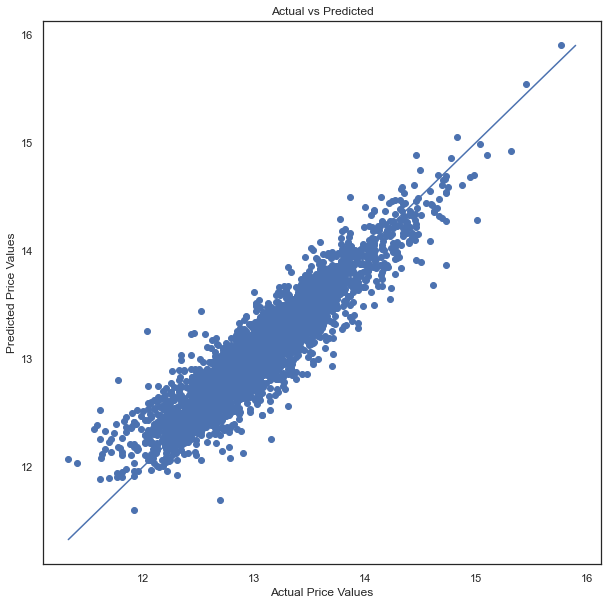

In [95]:
actual_vs_predicted(model1_ln_adj, X_test, y_test)

In [96]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model1_ln_adj_ols = sm.OLS(y_train, X_train).fit()

In [97]:
model1_ln_adj_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1590.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:19:19   Log-Likelihood:                 8542.0
No. Observations:               16116   AIC:                        -1.686e+04
Df Residuals:                   16006   BIC:                        -1.602e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -88.7125     12.070     -7.350      0.000    -112.371     -65.054
bedrooms            -0.0176      0.006     -3.142      0.002      -0.029      -0.007
sqft_above           0.5100      0.006     88.815      0.000       0.499       0.521
sqft_basement        0.0002   3.36e-06     53.308      0.000       0.000       0.000
lat                 25.2975      3.129      8.084      0.000      19.164      31.431
age_of_house         0.0003   7.05e-05      4.346      0.000       0.000       0.000
floors_1_5          -0.0221      0.005     -4.692      0.000      -0.031      -0.013
floors_2_0          -0.0335      0.004     -8.717      0.000      -0.041      -0.026
floors_2_5          -0.0493      0.016     -3.146      0.002      -0.080      -0.019
floors_3_0          -0.1705      0.009    -19.870      0.000      -0.187      -0.154
floors_3_5       -1.115e-15   4.17e-16     -2.674      0.008   -1.93e-15   -2.98e-16
waterfront_1         0.5029      0.020     24.693      0.000       0.463       0.543
view_1               0.1253      0.010     12.537      0.000       0.106       0.145
view_2               0.1119      0.006     18.875      0.000       0.100       0.123
view_3               0.1802      0.008     21.276      0.000       0.164       0.197
view_4               0.2795      0.013     21.358      0.000       0.254       0.305
condition_2          0.1271      0.084      1.505      0.132      -0.038       0.293
condition_3          0.2192      0.083      2.645      0.008       0.057       0.382
condition_4          0.2557      0.083      3.085      0.002       0.093       0.418
condition_5          0.3250      0.083      3.917      0.000       0.162       0.488
grade_4             -0.6541      0.160     -4.076      0.000      -0.969      -0.340
grade_5             -0.5979      0.144     -4.147      0.000      -0.880      -0.315
grade_6             -0.5078      0.144     -3.536      0.000      -0.789      -0.226
grade_7             -0.4196      0.144     -2.921      0.003      -0.701      -0.138
grade_8             -0.3272      0.144     -2.276      0.023      -0.609      -0.045
grade_9             -0.1906      0.144     -1.325      0.185      -0.473       0.091
grade_10            -0.0949      0.144     -0.659      0.510      -0.377       0.187
grade_11             0.0352      0.144      0.244      0.807      -0.247       0.318
grade_12             0.1763      0.146      1.208      0.227      -0.110       0.462
grade_13             0.3724      0.162      2.306      0.021       0.056       0.689
if_renovated_1       0.0737      0.007     10.671      0.000       0.060       0.087
zipcode_98002       -0.0221      0.015     -1.468      0.142      -0.052       0.007
zipcode_98003        0.0163      0.013      1.225      0.221      -0.010       0.042
zipcode_98004        0.


 Jarque-Bera ----
26.19839756817063

 Prob ----
2.0468699524891883e-06

 Skew ----
-0.09875389114424878

 Kurtosis ----
2.9976728931210546


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


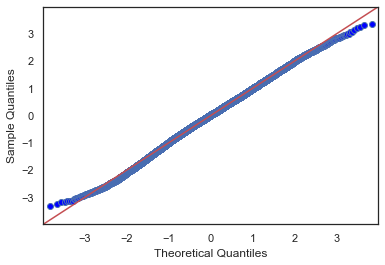

In [98]:
#test for normality
normality_test(model1_ln_adj_ols);


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.005634e+03
p-value                        1.553540e-144
f-value                         9.772855e+00
f p-value                      1.129177e-150

 Goldfeld-Quandt test ----
                value
F statistic  0.971764
p-value      0.899163

 Residuals plot ----


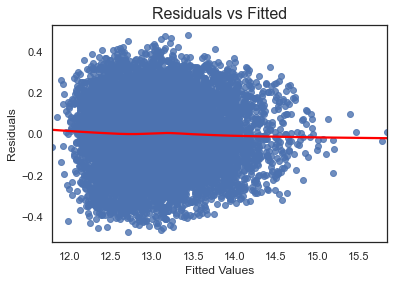

In [99]:
#test for homoscedasticity
homoscedasticity_test(model1_ln_adj_ols)

### Summary

In [100]:
print('\n Model 1: Untransformed Price, With Outliers ----')
print(model1_summary)
print('\n Model 1: Untransformed Price, Without Outliers ----')
print(model1_adj_summary)
print('\n Model 1: Log-Transformed Price, With Outliers ----')
print(model1_ln_summary)
print('\n Model 1: Log-Transformed Price, Without Outliers ----')
print(model1_ln_adj_summary)


 Model 1: Untransformed Price, With Outliers ----
The R-squared value for the train set was 0.836, and the R-squared value for the test set was 0.806. These values resulted in a differential of 0.0307. The RMSE of our model predicitons was 159586.6

 Model 1: Untransformed Price, Without Outliers ----
The R-squared value for the train set was 0.908, and the R-squared value for the test set was 0.799. These values resulted in a differential of 0.10882. The RMSE of our model predicitons was 162325.76

 Model 1: Log-Transformed Price, With Outliers ----
The R-squared value for the train set was 0.878, and the R-squared value for the test set was 0.872. These values resulted in a differential of 0.00535. The RMSE of our model predicitons was 125650.69

 Model 1: Log-Transformed Price, Without Outliers ----
The R-squared value for the train set was 0.915, and the R-squared value for the test set was 0.872. These values resulted in a differential of 0.04374. The RMSE of our model prediciton

We see from the various Model 1 analysis, the log-transformed price data had a higher R-squared value and lower RMSE than those of the non-transformed price data. In addition, after we removed the outliers from the train data, we noticed a higher train R-squared value, but a lower test R-Squared value and higher RMSE.

Therefore, we see that log-transformed price data with outliers is the best Model 1.

In [101]:
best_model1_summary = model1_ln_summary

## Model 2

In Model 2 we drop features that had a relatively high p-value (alpha = 0.05) from Model 1 ln price OLS with outliers removed to look for improvement in model fit.

### Model 2: Filtering by p-value

In [102]:
#create a dataframe for the parameters and pvalues
results = pd.DataFrame(model1_ln_ols.pvalues)
results.reset_index(inplace=True)

#rename the columns
results.rename(columns={'index': 'parameter', 0: 'pvalue'}, inplace=True)

#create a list of parameters that have a pvalue < 0.05
feat = results[results['pvalue'] < 0.05]
features = list(feat['parameter'])

#the intercept constant is not needed 
features.remove('const')

### Model 2: Fitting and Validation

We fit the data by running only the features selected above.

In [103]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test(output_ln, 'ln_price')

#create linear regression model for price and setting up cross validation (x3)
model2 = LinearRegression()
model2.fit(X_train[features], y_train);

In [104]:
#setting up cross validation
model2_cval = cross_val(model2,
                        X=X_train[features],
                        y=y_train,
                        random_state=0)

model2_cval_summary = cval_summary(model2_cval[0],
                                   model2_cval[1],
                                   abs(model2_cval[0]-model2_cval[1]))
model2_cval_summary

'The median R-squared values for the train sets were 0.864, the median R-squared values for the test sets were 0.863. These values resulted in a differential of 0.001'

In [105]:
#find the test score using the linear model
model2_scores = score_model(model2,
                             X_train[features],
                             X_test[features],
                             y_train,
                             y_test,
                             log=True)

model2_summary = model_summary(model2_scores[0],
                               model2_scores[1],
                               abs(model2_scores[0]-model2_scores[1]),
                               model2_scores[2])
model2_summary

'The R-squared value for the train set was 0.864, and the R-squared value for the test set was 0.855. These values resulted in a differential of 0.00871. The RMSE of our model predicitons was 142886.98'

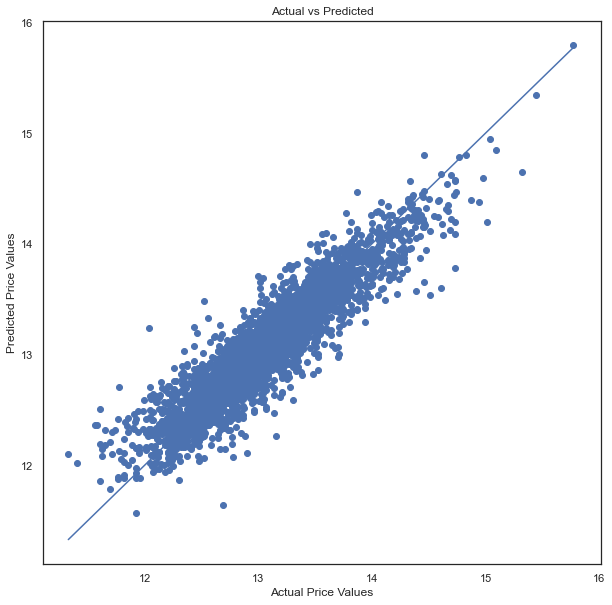

In [106]:
actual_vs_predicted(model2, X_test[features], y_test)

### Model 2: OLS and Assumption Tests

In [107]:
#add constant to X_train
X_train = sm.add_constant(X_train[features])

#find OLS for train data set
model2_ols = sm.OLS(y_train, X_train).fit()

In [108]:
model2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1255.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:19:42   Log-Likelihood:                 3766.3
No. Observations:               17276   AIC:                            -7357.
Df Residuals:                   17188   BIC:                            -6674.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -113.5616      8.719    -13.024      0.000    -130.652     -96.471
bedrooms            -0.0721      0.007    -10.164      0.000      -0.086      -0.058
sqft_above           0.6518      0.007     99.066      0.000       0.639       0.665
sqft_basement        0.0002   4.21e-06     48.995      0.000       0.000       0.000
lat                 31.3940      2.260     13.893      0.000      26.965      35.823
age_of_house      4.254e-05      9e-05      0.473      0.636      -0.000       0.000
floors_1_5          -0.0380      0.006     -6.256      0.000      -0.050      -0.026
floors_2_0          -0.0391      0.005     -7.798      0.000      -0.049      -0.029
floors_2_5          -0.0399      0.018     -2.192      0.028      -0.076      -0.004
floors_3_0          -0.1745      0.011    -15.591      0.000      -0.196      -0.153
floors_3_5          -0.1653      0.074     -2.229      0.026      -0.311      -0.020
waterfront_1         0.4464      0.022     20.076      0.000       0.403       0.490
view_1               0.1506      0.013     12.011      0.000       0.126       0.175
view_2               0.1415      0.008     18.622      0.000       0.127       0.156
view_3               0.2330      0.010     22.515      0.000       0.213       0.253
view_4               0.3641      0.015     23.929      0.000       0.334       0.394
condition_2          0.1758      0.047      3.749      0.000       0.084       0.268
condition_3          0.2797      0.044      6.333      0.000       0.193       0.366
condition_4          0.3151      0.044      7.131      0.000       0.228       0.402
condition_5          0.3847      0.044      8.666      0.000       0.298       0.472
grade_4             -0.2523      0.046     -5.524      0.000      -0.342      -0.163
grade_5             -0.1908      0.016    -12.267      0.000      -0.221      -0.160
grade_6             -0.1569      0.007    -21.729      0.000      -0.171      -0.143
grade_7             -0.1014      0.004    -24.047      0.000      -0.110      -0.093
if_renovated_1       0.0557      0.009      6.411      0.000       0.039       0.073
zipcode_98002       -0.0500      0.017     -2.982      0.003      -0.083      -0.017
zipcode_98004        0.9635      0.018     54.562      0.000       0.929       0.998
zipcode_98005        0.5861      0.021     27.866      0.000       0.545       0.627
zipcode_98006        0.5259      0.014     37.056      0.000       0.498       0.554
zipcode_98007        0.4715      0.022     21.235      0.000       0.428       0.515
zipcode_98008        0.4437      0.018     24.898      0.000       0.409       0.479
zipcode_98010        0.2561      0.022     11.675      0.000       0.213       0.299
zipcode_98011        0.1531      0.025      6.228      0.000       0.105       0.201
zipcode_98014        0.


 Jarque-Bera ----
3695.2848490919328

 Prob ----
0.0

 Skew ----
-0.007004030892932958

 Kurtosis ----
5.265685803271057


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


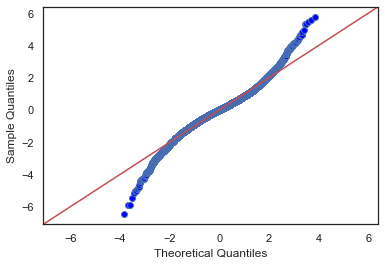

In [109]:
#test for normality
normality_test(model2_ols)


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.445381e+03
p-value                        5.105668e-245
f-value                         1.803809e+01
f p-value                      2.611495e-257

 Goldfeld-Quandt test ----
                value
F statistic  0.956395
p-value      0.980354

 Residuals plot ----


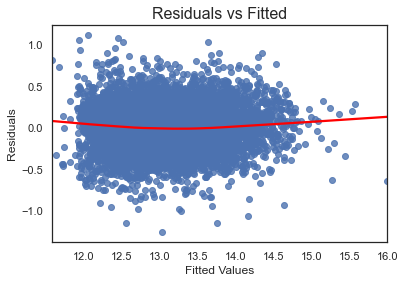

In [110]:
#test for homoscedasticity
homoscedasticity_test(model2_ols)

### Summary

In [111]:
print('\n Model 2: With Significant Features ----')
print(model2_summary)
print('\n Model 1: ----')
print(best_model1_summary)


 Model 2: With Significant Features ----
The R-squared value for the train set was 0.864, and the R-squared value for the test set was 0.855. These values resulted in a differential of 0.00871. The RMSE of our model predicitons was 142886.98

 Model 1: ----
The R-squared value for the train set was 0.878, and the R-squared value for the test set was 0.872. These values resulted in a differential of 0.00535. The RMSE of our model predicitons was 125650.69


Our fit on the data has dropped  by removing features containing p-values greater than 0.05. In light of this  decrease in accuracy we will still be relying on our "best" model 1.

## Model 3

Model 3 uses the same dataframe structure as Model 1, but introduces recursive feature elimination (RFE) of varying number of features to improve on the model.

### Model 3: Recursive Feature Elimination (RFE)

In [112]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test(output_ln, 'ln_price')

In [113]:
#determine how many features we have
len(X_train.columns)

110

We created a for loop to find the top column names based on varying n for the RFE.

In [114]:
#determine n for RFE
n = [10, 20, 50, 100]

key_cols = {}

for x in n:
    #instatiate Linear Regression
    lr_rfe = LinearRegression()
    select = RFE(lr_rfe, n_features_to_select=x)
    
    #fit model to RFE
    select.fit(X=X_train, y=y_train)
    
    #obtain the indexes where select.support_ is true
    true_indexes = [i for i, x in enumerate(select.support_) if x]
    
    #create a list of all column names matched with index and add to dictionary
    key_columns = []
    for i in true_indexes:
        key_columns.append(X_train.columns[i])
    key_cols["key_cols_{0}".format(x)] = key_columns 

### Model 3: Testing 10 Features

In [115]:
#create linear regression model for price and setting up cross validation (x3)
model3_10 = LinearRegression()
model3_10.fit(X_train[key_cols['key_cols_10']], y_train);

In [116]:
#setting up cross validation for price in a different way (x3)
model3_10_cval = cross_val(model3_10,
                       X=X_train[key_cols['key_cols_10']],
                       y=y_train,
                       random_state=0,)

model3_10_cval_summary = cval_summary(model3_10_cval[0],
                                      model3_10_cval[1],
                                      abs(model3_10_cval[0]-model3_10_cval[1]))

model3_10_cval_summary

'The median R-squared values for the train sets were 0.658, the median R-squared values for the test sets were 0.656. These values resulted in a differential of 0.00144'

In [117]:
#find the test score using the linear model
model3_10_scores = score_model(model3_10,
                           X_train[key_cols['key_cols_10']],
                           X_test[key_cols['key_cols_10']],
                           y_train,
                           y_test,
                              log=True)

model3_10_summary = model_summary(model3_10_scores[0],
                                  model3_10_scores[1],
                                  abs(model3_10_scores[0]-model3_10_scores[1]),
                                  model3_10_scores[2])
model3_10_summary

'The R-squared value for the train set was 0.657, and the R-squared value for the test set was 0.65. These values resulted in a differential of 0.00683. The RMSE of our model predicitons was 217229.83'

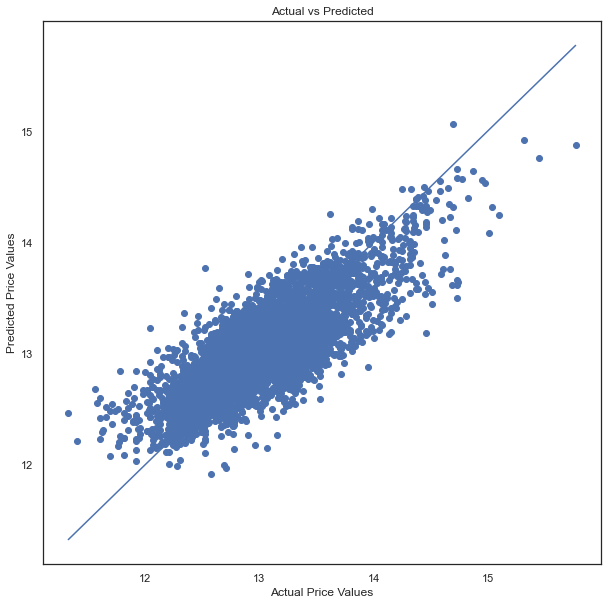

In [118]:
actual_vs_predicted(model3_10, X_test[key_cols['key_cols_10']], y_test)

In [119]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model3_10_ols = sm.OLS(y_train, X_train).fit()

In [120]:
model3_10_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:20:21   Log-Likelihood:                 4673.9
No. Observations:               17276   AIC:                            -9126.
Df Residuals:                   17165   BIC:                            -8265.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -95.4158     14.938     -6.387      0.000    -124.696     -66.136
bedrooms            -0.0264      0.007     -3.870      0.000      -0.040      -0.013
sqft_above           0.5109      0.007     72.261      0.000       0.497       0.525
sqft_basement        0.0002   4.08e-06     42.428      0.000       0.000       0.000
lat                 27.0210      3.873      6.977      0.000      19.429      34.612
age_of_house         0.0004   8.62e-05      4.238      0.000       0.000       0.001
floors_1_5          -0.0220      0.006     -3.792      0.000      -0.033      -0.011
floors_2_0          -0.0342      0.005     -7.167      0.000      -0.044      -0.025
floors_2_5          -0.0549      0.017     -3.172      0.002      -0.089      -0.021
floors_3_0          -0.1575      0.011    -14.753      0.000      -0.178      -0.137
floors_3_5          -0.1507      0.071     -2.137      0.033      -0.289      -0.012
waterfront_1         0.4545      0.021     21.475      0.000       0.413       0.496
view_1               0.1443      0.012     12.085      0.000       0.121       0.168
view_2               0.1206      0.007     16.640      0.000       0.106       0.135
view_3               0.1958      0.010     19.816      0.000       0.176       0.215
view_4               0.2964      0.015     20.354      0.000       0.268       0.325
condition_2          0.1574      0.045      3.535      0.000       0.070       0.245
condition_3          0.2603      0.042      6.203      0.000       0.178       0.342
condition_4          0.3029      0.042      7.217      0.000       0.221       0.385
condition_5          0.3722      0.042      8.826      0.000       0.290       0.455
grade_4             -0.6385      0.191     -3.347      0.001      -1.012      -0.265
grade_5             -0.5521      0.186     -2.962      0.003      -0.917      -0.187
grade_6             -0.4953      0.186     -2.662      0.008      -0.860      -0.131
grade_7             -0.3982      0.186     -2.140      0.032      -0.763      -0.033
grade_8             -0.2974      0.186     -1.597      0.110      -0.662       0.068
grade_9             -0.1591      0.186     -0.854      0.393      -0.524       0.206
grade_10            -0.0555      0.186     -0.297      0.766      -0.421       0.310
grade_11             0.0693      0.187      0.371      0.711      -0.297       0.435
grade_12             0.1891      0.188      1.007      0.314      -0.179       0.557
grade_13             0.3644      0.195      1.867      0.062      -0.018       0.747
if_renovated_1       0.0646      0.008      7.816      0.000       0.048       0.081
zipcode_98002       -0.0446      0.019     -2.370      0.018      -0.082      -0.008
zipcode_98003        0.0116      0.017      0.695      0.487      -0.021       0.044
zipcode_98004        0.


 Jarque-Bera ----
5372.534503957657

 Prob ----
0.0

 Skew ----
-0.13630161253628775

 Kurtosis ----
5.718320922963795


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


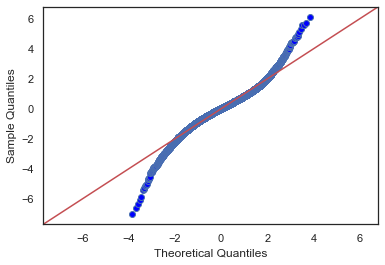

In [121]:
#test for normality
normality_test(model3_10_ols)


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.501054e+03
p-value                        9.753542e-243
f-value                         1.484839e+01
f p-value                      1.156442e-255

 Goldfeld-Quandt test ----
                value
F statistic  0.957364
p-value      0.977872

 Residuals plot ----


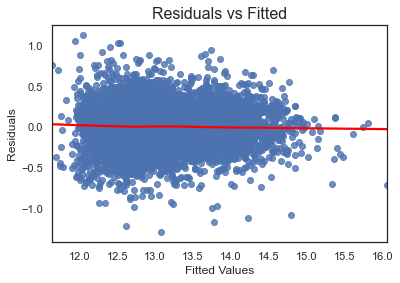

In [122]:
#test for homoscedasticity
homoscedasticity_test(model3_10_ols)

### Model 3: Testing 20 Features

In [123]:
#create linear regression model for price and setting up cross validation (x3)
model3_20 = LinearRegression()
model3_20.fit(X_train[key_cols['key_cols_20']], y_train);

In [124]:
#setting up cross validation for price in a different way (x3)
model3_20_cval = cross_val(model3_20,
                           X=X_train[key_cols['key_cols_20']],
                           y=y_train,
                           random_state=0,)

model3_20_cval_summary = cval_summary(model3_20_cval[0],
                                      model3_20_cval[1],
                                      abs(model3_20_cval[0]-model3_20_cval[1]))

model3_20_cval_summary

'The median R-squared values for the train sets were 0.725, the median R-squared values for the test sets were 0.726. These values resulted in a differential of 0.00116'

In [125]:
#find the test score using the linear model
model3_20_scores = score_model(model3_20,
                               X_train[key_cols['key_cols_20']],
                               X_test[key_cols['key_cols_20']],
                               y_train,
                               y_test,
                               log=True)

model3_20_summary = model_summary(model3_20_scores[0],
                                  model3_20_scores[1],
                                  abs(model3_20_scores[0]-model3_20_scores[1]),
                                  model3_20_scores[2])
model3_20_summary

'The R-squared value for the train set was 0.726, and the R-squared value for the test set was 0.717. These values resulted in a differential of 0.00898. The RMSE of our model predicitons was 182264.15'

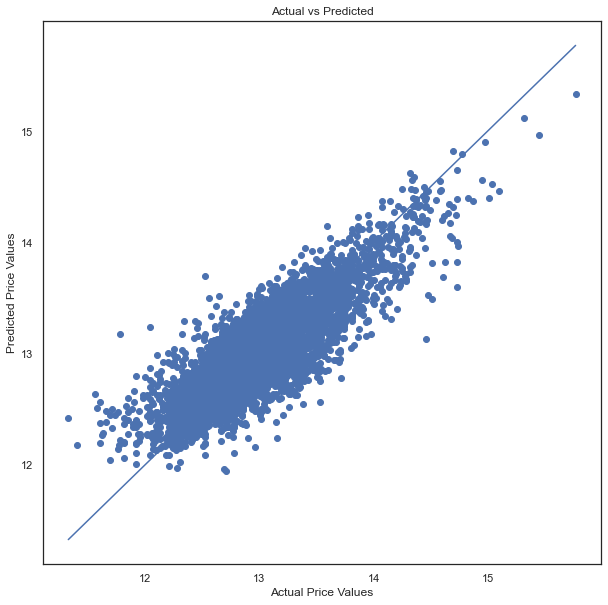

In [126]:
actual_vs_predicted(model3_20, X_test[key_cols['key_cols_20']], y_test)

In [127]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model3_20_ols = sm.OLS(y_train, X_train).fit()

In [128]:
model3_20_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:20:47   Log-Likelihood:                 4673.9
No. Observations:               17276   AIC:                            -9126.
Df Residuals:                   17165   BIC:                            -8265.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -95.4158     14.938     -6.387      0.000    -124.696     -66.136
bedrooms            -0.0264      0.007     -3.870      0.000      -0.040      -0.013
sqft_above           0.5109      0.007     72.261      0.000       0.497       0.525
sqft_basement        0.0002   4.08e-06     42.428      0.000       0.000       0.000
lat                 27.0210      3.873      6.977      0.000      19.429      34.612
age_of_house         0.0004   8.62e-05      4.238      0.000       0.000       0.001
floors_1_5          -0.0220      0.006     -3.792      0.000      -0.033      -0.011
floors_2_0          -0.0342      0.005     -7.167      0.000      -0.044      -0.025
floors_2_5          -0.0549      0.017     -3.172      0.002      -0.089      -0.021
floors_3_0          -0.1575      0.011    -14.753      0.000      -0.178      -0.137
floors_3_5          -0.1507      0.071     -2.137      0.033      -0.289      -0.012
waterfront_1         0.4545      0.021     21.475      0.000       0.413       0.496
view_1               0.1443      0.012     12.085      0.000       0.121       0.168
view_2               0.1206      0.007     16.640      0.000       0.106       0.135
view_3               0.1958      0.010     19.816      0.000       0.176       0.215
view_4               0.2964      0.015     20.354      0.000       0.268       0.325
condition_2          0.1574      0.045      3.535      0.000       0.070       0.245
condition_3          0.2603      0.042      6.203      0.000       0.178       0.342
condition_4          0.3029      0.042      7.217      0.000       0.221       0.385
condition_5          0.3722      0.042      8.826      0.000       0.290       0.455
grade_4             -0.6385      0.191     -3.347      0.001      -1.012      -0.265
grade_5             -0.5521      0.186     -2.962      0.003      -0.917      -0.187
grade_6             -0.4953      0.186     -2.662      0.008      -0.860      -0.131
grade_7             -0.3982      0.186     -2.140      0.032      -0.763      -0.033
grade_8             -0.2974      0.186     -1.597      0.110      -0.662       0.068
grade_9             -0.1591      0.186     -0.854      0.393      -0.524       0.206
grade_10            -0.0555      0.186     -0.297      0.766      -0.421       0.310
grade_11             0.0693      0.187      0.371      0.711      -0.297       0.435
grade_12             0.1891      0.188      1.007      0.314      -0.179       0.557
grade_13             0.3644      0.195      1.867      0.062      -0.018       0.747
if_renovated_1       0.0646      0.008      7.816      0.000       0.048       0.081
zipcode_98002       -0.0446      0.019     -2.370      0.018      -0.082      -0.008
zipcode_98003        0.0116      0.017      0.695      0.487      -0.021       0.044
zipcode_98004        0.


 Jarque-Bera ----
5372.534503957657

 Prob ----
0.0

 Skew ----
-0.13630161253628775

 Kurtosis ----
5.718320922963795


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


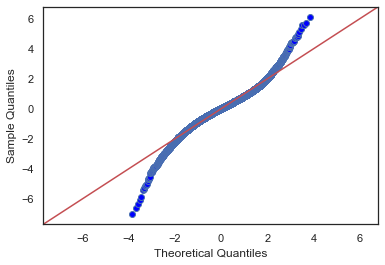

In [129]:
#test for normality
normality_test(model3_20_ols)


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.501054e+03
p-value                        9.753542e-243
f-value                         1.484839e+01
f p-value                      1.156442e-255

 Goldfeld-Quandt test ----
                value
F statistic  0.957364
p-value      0.977872

 Residuals plot ----


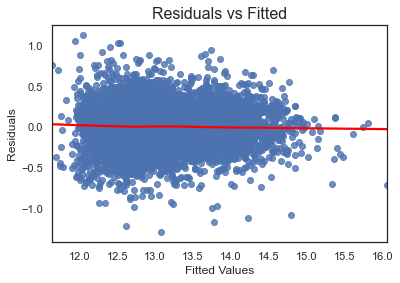

In [130]:
#test for homoscedasticity
homoscedasticity_test(model3_20_ols)

### Model 3: Testing 50 Features

In [131]:
#create linear regression model for price and setting up cross validation (x3)
model3_50 = LinearRegression()
model3_50.fit(X_train[key_cols['key_cols_50']], y_train);

In [132]:
#setting up cross validation for price in a different way (x3)
model3_50_cval = cross_val(model3_50,
                           X=X_train[key_cols['key_cols_50']],
                           y=y_train,
                           random_state=0,)

model3_50_cval_summary = cval_summary(model3_50_cval[0],
                                      model3_50_cval[1],
                                      abs(model3_50_cval[0]-model3_50_cval[1]))

model3_50_cval_summary

'The median R-squared values for the train sets were 0.839, the median R-squared values for the test sets were 0.841. These values resulted in a differential of 0.0017'

In [133]:
#find the test score using the linear model
model3_50_scores = score_model(model3_50,
                               X_train[key_cols['key_cols_50']],
                               X_test[key_cols['key_cols_50']],
                               y_train,
                               y_test,
                               log=True)

model3_50_summary = model_summary(model3_50_scores[0],
                                  model3_50_scores[1],
                                  abs(model3_50_scores[0]-model3_50_scores[1]),
                                  model3_50_scores[2])
model3_50_summary

'The R-squared value for the train set was 0.84, and the R-squared value for the test set was 0.835. These values resulted in a differential of 0.00482. The RMSE of our model predicitons was 140442.38'

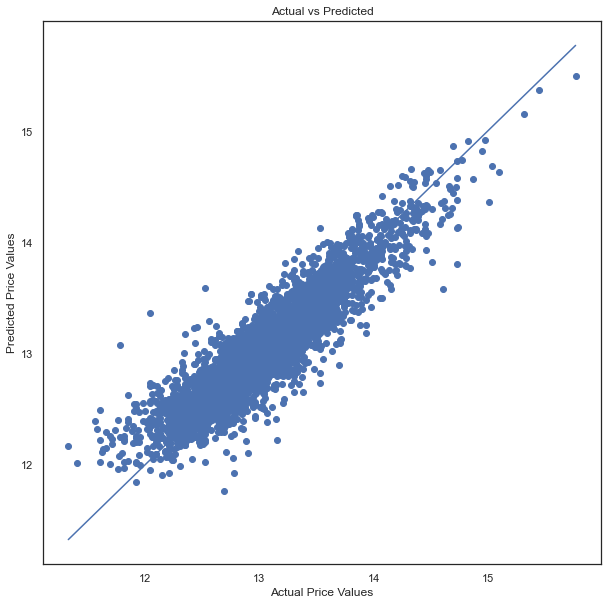

In [134]:
actual_vs_predicted(model3_50, X_test[key_cols['key_cols_50']], y_test)

In [135]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model3_50_ols = sm.OLS(y_train, X_train).fit()

In [136]:
model3_50_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:21:12   Log-Likelihood:                 4673.9
No. Observations:               17276   AIC:                            -9126.
Df Residuals:                   17165   BIC:                            -8265.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -95.4158     14.938     -6.387      0.000    -124.696     -66.136
bedrooms            -0.0264      0.007     -3.870      0.000      -0.040      -0.013
sqft_above           0.5109      0.007     72.261      0.000       0.497       0.525
sqft_basement        0.0002   4.08e-06     42.428      0.000       0.000       0.000
lat                 27.0210      3.873      6.977      0.000      19.429      34.612
age_of_house         0.0004   8.62e-05      4.238      0.000       0.000       0.001
floors_1_5          -0.0220      0.006     -3.792      0.000      -0.033      -0.011
floors_2_0          -0.0342      0.005     -7.167      0.000      -0.044      -0.025
floors_2_5          -0.0549      0.017     -3.172      0.002      -0.089      -0.021
floors_3_0          -0.1575      0.011    -14.753      0.000      -0.178      -0.137
floors_3_5          -0.1507      0.071     -2.137      0.033      -0.289      -0.012
waterfront_1         0.4545      0.021     21.475      0.000       0.413       0.496
view_1               0.1443      0.012     12.085      0.000       0.121       0.168
view_2               0.1206      0.007     16.640      0.000       0.106       0.135
view_3               0.1958      0.010     19.816      0.000       0.176       0.215
view_4               0.2964      0.015     20.354      0.000       0.268       0.325
condition_2          0.1574      0.045      3.535      0.000       0.070       0.245
condition_3          0.2603      0.042      6.203      0.000       0.178       0.342
condition_4          0.3029      0.042      7.217      0.000       0.221       0.385
condition_5          0.3722      0.042      8.826      0.000       0.290       0.455
grade_4             -0.6385      0.191     -3.347      0.001      -1.012      -0.265
grade_5             -0.5521      0.186     -2.962      0.003      -0.917      -0.187
grade_6             -0.4953      0.186     -2.662      0.008      -0.860      -0.131
grade_7             -0.3982      0.186     -2.140      0.032      -0.763      -0.033
grade_8             -0.2974      0.186     -1.597      0.110      -0.662       0.068
grade_9             -0.1591      0.186     -0.854      0.393      -0.524       0.206
grade_10            -0.0555      0.186     -0.297      0.766      -0.421       0.310
grade_11             0.0693      0.187      0.371      0.711      -0.297       0.435
grade_12             0.1891      0.188      1.007      0.314      -0.179       0.557
grade_13             0.3644      0.195      1.867      0.062      -0.018       0.747
if_renovated_1       0.0646      0.008      7.816      0.000       0.048       0.081
zipcode_98002       -0.0446      0.019     -2.370      0.018      -0.082      -0.008
zipcode_98003        0.0116      0.017      0.695      0.487      -0.021       0.044
zipcode_98004        0.


 Jarque-Bera ----
5372.534503957657

 Prob ----
0.0

 Skew ----
-0.13630161253628775

 Kurtosis ----
5.718320922963795


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


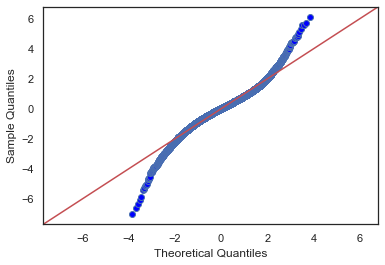

In [137]:
#test for normality
normality_test(model3_50_ols)


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.501054e+03
p-value                        9.753542e-243
f-value                         1.484839e+01
f p-value                      1.156442e-255

 Goldfeld-Quandt test ----
                value
F statistic  0.957364
p-value      0.977872

 Residuals plot ----


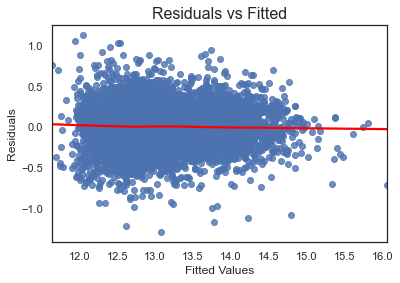

In [138]:
#test for homoscedasticity
homoscedasticity_test(model3_50_ols)

### Model 3: Testing 100 Features

In [139]:
#create linear regression model for price and setting up cross validation (x3)
model3_100 = LinearRegression()
model3_100.fit(X_train[key_cols['key_cols_100']], y_train);

In [140]:
#setting up cross validation for price in a different way (x3)
model3_100_cval = cross_val(model3_100,
                            X=X_train[key_cols['key_cols_100']],
                            y=y_train,
                            random_state=0,)

model3_100_cval_summary = cval_summary(model3_100_cval[0],
                                       model3_100_cval[1],
                                       abs(model3_100_cval[0]-model3_100_cval[1]))

model3_100_cval_summary

'The median R-squared values for the train sets were 0.864, the median R-squared values for the test sets were 0.864. These values resulted in a differential of 0.00039'

In [141]:
#find the test score using the linear model
model3_100_scores = score_model(model3_100,
                                X_train[key_cols['key_cols_100']],
                                X_test[key_cols['key_cols_100']],
                                y_train,
                                y_test,
                                log=True)

model3_100_summary = model_summary(model3_100_scores[0],
                                   model3_100_scores[1],
                                   abs(model3_100_scores[0]-model3_100_scores[1]),
                                   model3_100_scores[2])
model3_100_summary

'The R-squared value for the train set was 0.865, and the R-squared value for the test set was 0.861. These values resulted in a differential of 0.00388. The RMSE of our model predicitons was 129906.39'

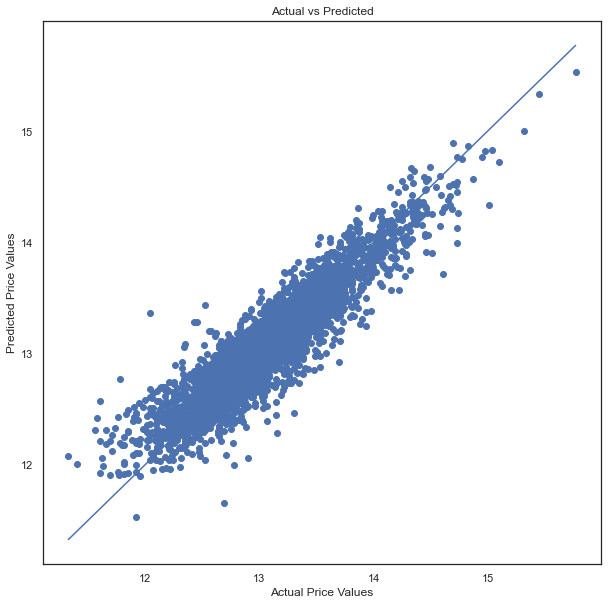

In [142]:
actual_vs_predicted(model3_100, X_test[key_cols['key_cols_100']], y_test)

In [143]:
#add constant to X_train
X_train = sm.add_constant(X_train)

#find OLS for train data set
model3_100_ols = sm.OLS(y_train, X_train).fit()

In [144]:
model3_100_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:21:39   Log-Likelihood:                 4673.9
No. Observations:               17276   AIC:                            -9126.
Df Residuals:                   17165   BIC:                            -8265.
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -95.4158     14.938     -6.387      0.000    -124.696     -66.136
bedrooms            -0.0264      0.007     -3.870      0.000      -0.040      -0.013
sqft_above           0.5109      0.007     72.261      0.000       0.497       0.525
sqft_basement        0.0002   4.08e-06     42.428      0.000       0.000       0.000
lat                 27.0210      3.873      6.977      0.000      19.429      34.612
age_of_house         0.0004   8.62e-05      4.238      0.000       0.000       0.001
floors_1_5          -0.0220      0.006     -3.792      0.000      -0.033      -0.011
floors_2_0          -0.0342      0.005     -7.167      0.000      -0.044      -0.025
floors_2_5          -0.0549      0.017     -3.172      0.002      -0.089      -0.021
floors_3_0          -0.1575      0.011    -14.753      0.000      -0.178      -0.137
floors_3_5          -0.1507      0.071     -2.137      0.033      -0.289      -0.012
waterfront_1         0.4545      0.021     21.475      0.000       0.413       0.496
view_1               0.1443      0.012     12.085      0.000       0.121       0.168
view_2               0.1206      0.007     16.640      0.000       0.106       0.135
view_3               0.1958      0.010     19.816      0.000       0.176       0.215
view_4               0.2964      0.015     20.354      0.000       0.268       0.325
condition_2          0.1574      0.045      3.535      0.000       0.070       0.245
condition_3          0.2603      0.042      6.203      0.000       0.178       0.342
condition_4          0.3029      0.042      7.217      0.000       0.221       0.385
condition_5          0.3722      0.042      8.826      0.000       0.290       0.455
grade_4             -0.6385      0.191     -3.347      0.001      -1.012      -0.265
grade_5             -0.5521      0.186     -2.962      0.003      -0.917      -0.187
grade_6             -0.4953      0.186     -2.662      0.008      -0.860      -0.131
grade_7             -0.3982      0.186     -2.140      0.032      -0.763      -0.033
grade_8             -0.2974      0.186     -1.597      0.110      -0.662       0.068
grade_9             -0.1591      0.186     -0.854      0.393      -0.524       0.206
grade_10            -0.0555      0.186     -0.297      0.766      -0.421       0.310
grade_11             0.0693      0.187      0.371      0.711      -0.297       0.435
grade_12             0.1891      0.188      1.007      0.314      -0.179       0.557
grade_13             0.3644      0.195      1.867      0.062      -0.018       0.747
if_renovated_1       0.0646      0.008      7.816      0.000       0.048       0.081
zipcode_98002       -0.0446      0.019     -2.370      0.018      -0.082      -0.008
zipcode_98003        0.0116      0.017      0.695      0.487      -0.021       0.044
zipcode_98004        0.


 Jarque-Bera ----
5372.534503957657

 Prob ----
0.0

 Skew ----
-0.13630161253628775

 Kurtosis ----
5.718320922963795


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


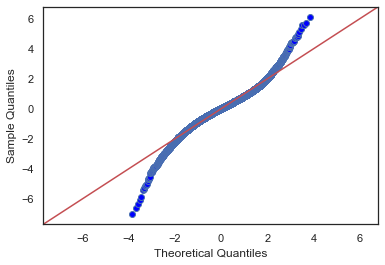

In [145]:
#test for normality
normality_test(model3_100_ols)


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.501054e+03
p-value                        9.753542e-243
f-value                         1.484839e+01
f p-value                      1.156442e-255

 Goldfeld-Quandt test ----
                value
F statistic  0.957364
p-value      0.977872

 Residuals plot ----


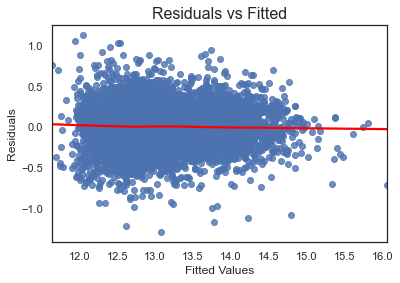

In [146]:
#test for homoscedasticity
homoscedasticity_test(model3_100_ols)

### Model 3: Summary

In [147]:
print('\n Model 3: Testing 10 Features ----')
print(model3_10_summary)
print('\n Model 3: Testing 20 Features ----')
print(model3_20_summary)
print('\n Model 3: Testing 50 Features ----')
print(model3_50_summary)
print('\n Model 3: Testing 100 Features ----')
print(model3_100_summary)
print('\n Model 1: ----')
print(best_model1_summary)


 Model 3: Testing 10 Features ----
The R-squared value for the train set was 0.657, and the R-squared value for the test set was 0.65. These values resulted in a differential of 0.00683. The RMSE of our model predicitons was 217229.83

 Model 3: Testing 20 Features ----
The R-squared value for the train set was 0.726, and the R-squared value for the test set was 0.717. These values resulted in a differential of 0.00898. The RMSE of our model predicitons was 182264.15

 Model 3: Testing 50 Features ----
The R-squared value for the train set was 0.84, and the R-squared value for the test set was 0.835. These values resulted in a differential of 0.00482. The RMSE of our model predicitons was 140442.38

 Model 3: Testing 100 Features ----
The R-squared value for the train set was 0.865, and the R-squared value for the test set was 0.861. These values resulted in a differential of 0.00388. The RMSE of our model predicitons was 129906.39

 Model 1: ----
The R-squared value for the train set

Looking at the score results above it becomes apparent that the trade off for removing features from our original model is a reduced R-squared statistic. It is interesting to note however, that although the 100 feature model's r-squared statistic is the same as that of Model 1, the differential between train and test was also more narrow. This trend continues down to 50 features and then the differential begins to rise again signaling that there may be some "best" number of features for balance between r-squared and the spread between test and train.

However, Model 1 still has a higher or similar R-squared score and a lower RMSE than those of the different versions of Model 3. Therefore, Model 1 is still our best model.

## Model 4

In Model 4, we utilized Binomial Feature Engineering.

### Model 4: Binomial Feature Engineering

In [148]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test(output_ln, 'ln_price')

#setting up binomial features from Train/Test split that uses ln_price as a y value
pf = PolynomialFeatures(degree=2)
pf.fit(X_train);

In [149]:
#Training/tranforming the data using the fit pf object. Formatting as DataFrame for ease of use
pdf_train = pd.DataFrame(pf.transform(X_train), columns = pf.get_feature_names())
pdf_test = pd.DataFrame(pf.transform(X_test), columns = pf.get_feature_names())
pdf_train.index = y_train.index
pdf_test.index = y_test.index

### Model 4: Pearson Correlation Coefficient Filtering

In [150]:
#calculating corr to the df with polynomial features to the train y values 
correlations = pdf_train.corrwith(y_train)
correlations_df = pd.DataFrame(correlations)
correlations_df.head()

,0
1,NaN
x0,0.340720
x1,0.585448
x2,0.321703
x3,0.447641


In [151]:
#NaN values represent columns containing 0 values, we wont need to consider these
correlations_df.dropna(inplace=True)

In [152]:
#Mapping absolute value over the correlations_df to allow us to find the most impactful coefs
correlations_df[0].map(abs)
#Sorting them so that we can skim the best ones off the top
correlations_df.sort_values(by=0,ascending=False,inplace=True)

In [153]:
#Column names of the top x number of features from our polynomial df, adding 1 to represent the intercept
features = list(correlations_df.index[:500]) + ['1']

### Model 4: Model Validation

In [154]:
#instantiating a linear regression object
model4 = LinearRegression()
model4.fit(X = pdf_train[features], y = y_train);

In [155]:
model4_cval = cross_val(model4,
                        X=pdf_train[features],
                        y=y_train,
                        random_state=0)

model4_cval_summary = cval_summary(model4_cval[0],
                                   model4_cval[1],
                                   abs(model4_cval[0]-model4_cval[1]))

model4_cval_summary

'The median R-squared values for the train sets were 0.849, the median R-squared values for the test sets were 0.723. These values resulted in a differential of 0.12644'

In [156]:
model4_scores = score_model(model4,
                            pdf_train[features],
                            pdf_test[features],
                            y_train,
                            y_test,
                            log=True)

model4_summary = model_summary(model4_scores[0],
                               model4_scores[1],
                               abs(model4_scores[0]-model4_scores[1]),
                               model4_scores[2])
model4_summary

'The R-squared value for the train set was 0.848, and the R-squared value for the test set was 0.834. These values resulted in a differential of 0.01383. The RMSE of our model predicitons was 136008.66'

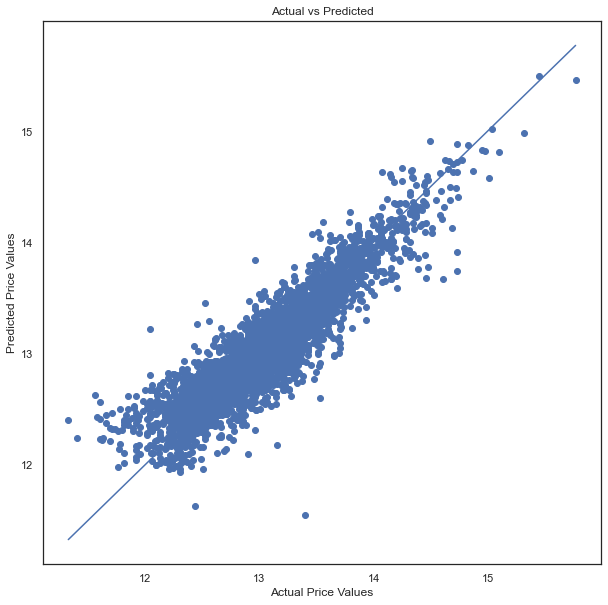

In [157]:
actual_vs_predicted(model4, pdf_test[features], y_test)

### Model 4: OLS and Assumption Testing

In [158]:
pdf_train_wconst = sm.add_constant(pdf_train[features])
model4_ols = sm.OLS(y_train,pdf_train_wconst).fit()

In [159]:
model4_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     201.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:22:23   Log-Likelihood:                 2803.4
No. Observations:               17276   AIC:                            -4673.
Df Residuals:                   16809   BIC:                            -1050.
Df Model:                         466                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1 x3        -21.9019      2.837     -7.721      0.000     -27.462     -16.342
x1^2           0.0526      0.021      2.476      0.013       0.011       0.094
x1            84.4196     10.981      7.688      0.000      62.896     105.943
x3          3.919e+04   1587.048     24.692      0.000    3.61e+04    4.23e+04
x3^2       -5047.2180    205.369    -24.576      0.000   -5449.763   -4644.673
x0 x1         -0.0605      0.036     -1.685      0.092      -0.131       0.010
x0^2          -0.0270      0.020     -1.344      0.179      -0.066       0.012
x1 x2         -0.0001   2.33e-05     -6.398      0.000      -0.000      -0.000
x0 x3          7.3026      3.002      2.432      0.015       1.418      13.188
x0           -27.8633     11.604     -2.401      0.016     -50.608      -5.118
x0 x25         0.0644      0.051      1.261      0.207      -0.036       0.165
x1 x25         0.1631      0.049      3.348      0.001       0.068       0.259
x3 x25         4.9321      4.227      1.167      0.243      -3.354      13.218
x25           -9.7523      8.179     -1.192      0.233     -25.785       6.280
x25^2         -9.7606      8.179     -1.193      0.233     -25.793       6.272
x0 x2      -1.694e-05   2.14e-05     -0.791      0.429   -5.89e-05     2.5e-05
x2 x6       2.541e-05   1.49e-05      1.704      0.088   -3.81e-06    5.46e-05
x2^2       -5.238e-08   1.02e-08     -5.150      0.000   -7.23e-08   -3.24e-08
x2 x3         -0.0036      0.002     -1.930      0.054      -0.007    5.69e-05
x2             0.0153      0.007      2.119      0.034       0.001       0.029
x0 x6          0.1224      0.022      5.447      0.000       0.078       0.166
x0 x24         0.0574      0.035      1.634      0.102      -0.011       0.126
x1 x24         0.0870      0.032      2.683      0.007       0.023       0.151
x3 x24         6.1288      2.667      2.298      0.022       0.901      11.357
x24          -12.0130      5.161     -2.328      0.020     -22.129      -1.897
x24^2        -12.0129      5.161     -2.328      0.020     -22.129      -1.897
x1 x6         -0.0549      0.019     -2.849      0.004      -0.093      -0.017
x4 x25        -0.0008      0.001     -1.370      0.171      -0.002       0.000
x6 x25        -0.0666      0.027     -2.430      0.015      -0.120      -0.013
x4 x24        -0.0009      0.000     -2.605      0.009      -0.002      -0.000
x1 x26         0.2023      0.079      2.577      0.010       0.048       0.356
x3 x26        16.2579      8.077      2.013      0.044       0.427      32.089
x26^2        -27.2357     13.411     -2.031      0.042     -53.522      -0.949
x26          -27.2357     13.411     -2.031      0.042     -53.522      -0.949
x16 x25       -0.4286      0.220     -1.948      0.051      -0.860       0.003
x3 x6          0.6794      1.755      0.387      0.699      -2.762       4.120
x0


 Jarque-Bera ----
2867.791466420855

 Prob ----
0.0

 Skew ----
-0.21153465377572395

 Kurtosis ----
4.950635352571832


<ipython-input-43-42a69f1a355e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


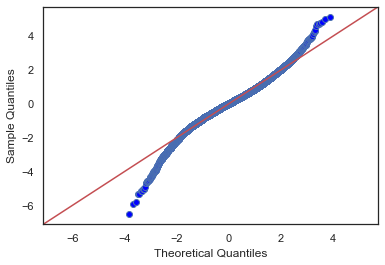

In [160]:
#test for normality
normality_test(model4_ols)


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.846273e+03
p-value                        2.902795e-153
f-value                         4.316120e+00
f p-value                      3.349153e-176

 Goldfeld-Quandt test ----
                value
F statistic  0.962651
p-value      0.957368

 Residuals plot ----


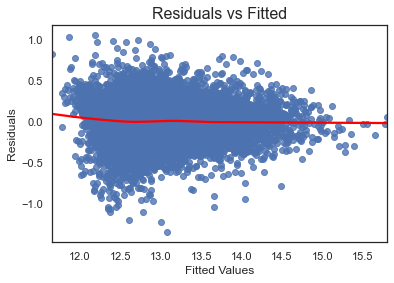

In [161]:
#test for homoscedasticity
homoscedasticity_test(model4_ols)

### Model 4: Summary

In [162]:
print('\n Model 4: Binomial Feature Engineering ----')
print(model4_summary)
print('\n Model 1: ----')
print(best_model1_summary)


 Model 4: Binomial Feature Engineering ----
The R-squared value for the train set was 0.848, and the R-squared value for the test set was 0.834. These values resulted in a differential of 0.01383. The RMSE of our model predicitons was 136008.66

 Model 1: ----
The R-squared value for the train set was 0.878, and the R-squared value for the test set was 0.872. These values resulted in a differential of 0.00535. The RMSE of our model predicitons was 125650.69


Though Model 4 has a similar R-squared train score as that of Model 1, the Model 4 test R-squared test score was significantly lower than that of Model 1. In addition, Model 4's RMSE was significantly higher than that of Model 1. This may be due to the fact there are a few outliers in the test sample as seen in the Actual vs Predicted scatter plot above.

## Top Features in Model 1

Using the best model, which is Model 1, we found the best features by analyzing the top coefficients of the linear model.

In [163]:
features = {x[0]:abs(x[1]) for x in zip(X_test.columns,model1_ln.coef_)}
features = sorted(features.items(), key=lambda x: x[1], reverse=True)
features

[('lat', 27.020974920676302),
 ('zipcode_98039', 1.11371949280477),
 ('zipcode_98004', 0.9356959530792092),
 ('zipcode_98112', 0.8588499955281345),
 ('zipcode_98109', 0.7999487978178518),
 ('zipcode_98119', 0.7740322302498982),
 ('zipcode_98102', 0.7493133070421139),
 ('zipcode_98105', 0.7329331359599397),
 ('zipcode_98040', 0.7284060023946941),
 ('zipcode_98199', 0.6517710679103875),
 ('zipcode_98107', 0.6395758429493028),
 ('grade_4', 0.6385190634766316),
 ('zipcode_98122', 0.6164989533561924),
 ('zipcode_98103', 0.6043330470456216),
 ('zipcode_98116', 0.5977829658726295),
 ('zipcode_98115', 0.5919509135280152),
 ('zipcode_98117', 0.5837828240634897),
 ('zipcode_98033', 0.5715801641908025),
 ('zipcode_98005', 0.569615623534024),
 ('grade_5', 0.5520783992979734),
 ('zipcode_98136', 0.5478318830508802),
 ('sqft_above', 0.5109328638591007),
 ('zipcode_98144', 0.5010874626472445),
 ('zipcode_98006', 0.4974344412864027),
 ('grade_6', 0.4952974961010524),
 ('zipcode_98007', 0.4751213431520

Upon visual inspection of the absolute value of each of the top coefficients it becomes apparent that our model predicted heavily using positional data, followed by certain grades, and sqft_living as the next non-positional continuous feature behind lat/long.

## Conclusions

The final conclusion of the business recommendation hinges on our best-performing Model 1: a multiple linear regression model. More specifically, this multi-linear regression model leverages the power of log to transform all positive variables. Simultaneously, this model also dummies out categorical variables to derive its statistical results. The multiple linear regression model proves to be the most robut model in dealing with outlier values while also proving to be the most accurate model when benchmarked against its R-Squared values as well as its RMSE values.

Hence, given a set of housing datapoints, our multiple linear regression model can aid in predicting the housing prices from a given dataset. While one may assume that complex models may provide a more accurate prediction, our results reveal that a more simple model actually provides more accurate solutions, thus satisfying the principle of Occam's razor. Furthermore, the simple multiple linear regression model also reveals that amongst all features, location features and square footage of living space seems to have the biggest impact on housing prices. Thus, for the sake of predicting home values, it is essential to capture accurate data pertaining to these two features of any home.